# [Personal Project]

> ## * Subject:   SALARY PREDICTION of Players who sign a FA Contract
>
> ## * Content:
>    * The goal of this project is to predict the 2018 FA Salaries of qualified players in 2018 based on many data that analized stats of players in the past. (Based on the FA results from 2006 to 2017)
>
>    * The 2018 FA Salaries are predicted by 2017 stats(2017.04 ~ 2017.10)

In [1]:
from sklearn.preprocessing import normalize, LabelEncoder
from patsy import dmatrix
from sklearn.linear_model import LinearRegression, LassoCV, LassoLarsCV, RidgeCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import cross_validation
from sklearn.metrics import explained_variance_score, mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import xgboost as xgb
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../dataset/mlb_fa_list2.csv')

print(df.shape)
df.tail()

(1225, 72)


Name    Yr          Team    G     AB     PA    H_b     1B  \
1220      Trevor Plouffe  2016         Twins   84  319.0  344.0   83.0   57.0   
1221          Tyson Ross  2016        Padres    1    0.0    0.0    0.0    0.0   
1222  Welington Castillo  2016  Diamondbacks  113  416.0  457.0  110.0   72.0   
1223        Wilson Ramos  2016     Nationals  131  482.0  523.0  148.0  101.0   
1224     Yoenis Cespedes  2016          Mets  132  479.0  543.0  134.0   77.0   

        2B   3B  HR_b   R_b   RBI  BB_b  IBB_b   SO_b  BB%    K%  BB/K  \
1220  13.0  1.0  12.0  35.0  47.0  19.0    0.0   60.0  5.5  17.4  0.32   
1221   0.0  0.0   0.0   0.0   0.0   0.0    0.0    0.0  0.0   0.0  0.00   
1222  24.0  0.0  14.0  41.0  68.0  33.0    3.0  121.0  7.2  26.5  0.27   
1223  25.0  0.0  22.0  58.0  80.0  35.0    2.0   79.0  6.7  15.1  0.44   
1224  25.0  1.0  31.0  72.0  86.0  51.0    8.0  108.0  9.4  19.9  0.47   

      BABIP_b  HBP_b   SF   SH   GDP   SB   CS  Def    ISO   wOBA  wRAA  \
1220    0.284    2.0  3.0  1.0  11.0  1.0  0.0 -8.4  0.160  0.311  -2.1   
1221    0.000    0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000  0.000   0.0   
1222    0.337    4.0  4.0  0.0   5.0  2.0  0.0  9.8  0.159  0.319   0.4   
1223    0.327    2.0  4.0  0.0  17.0  0.0  0.0  8.4  0.189  0.361  18.7   
1224    0.298    7.0  6.0  0.0  14.0  3.0  1.0 -9.2  0.251  0.369  22.8   

        AVG    OBP    SLG    OPS  WAR   wRC+   WPA    W    L   GS   CG   IP  \
1220  0.260  0.303  0.420  0.723 -0.4   91.0  0.50  0.0  0.0  0.0  0.0  0.0   
1221  0.000  0.000  0.000  0.000  0.1    0.0 -0.24  0.0  1.0  1.0  0.0  5.1   
1222  0.264  0.322  0.423  0.745  1.6   91.0  0.64  0.0  0.0  0.0  0.0  0.0   
1223  0.307  0.354  0.496  0.850  3.4  124.0  2.58  0.0  0.0  0.0  0.0  0.0   
1224  0.280  0.354  0.530  0.884  3.2  135.0  3.21  0.0  0.0  0.0  0.0  0.0   

      H_p  HR_p  BB_p  SO_p  R_p   SV   BS   BK   ER  HBP_p  HLD  IBB_p  ShO  \
1220  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   
1221  9.0   0.0   1.0   5.0  8.0  0.0  0.0  0.0  7.0    2.0  0.0    0.0  0.0   
1222  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   
1223  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   
1224  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   

       TBF   WP  HR/9  BB/9   K/9  K/BB  K-BB%   GB%  HR/FB  LOB%    ERA  \
1220   0.0  0.0   0.0  0.00  0.00   0.0    0.0   0.0    0.0   0.0   0.00   
1221  27.0  1.0   0.0  1.69  8.44   5.0   14.8  47.4    0.0  33.3  11.81   
1222   0.0  0.0   0.0  0.00  0.00   0.0    0.0   0.0    0.0   0.0   0.00   
1223   0.0  0.0   0.0  0.00  0.00   0.0    0.0   0.0    0.0   0.0   0.00   
1224   0.0  0.0   0.0  0.00  0.00   0.0    0.0   0.0    0.0   0.0   0.00   

      BABIP_p   FIP  WHIP  Contract Yrs  Total Salary($)  Avg Salary($)  
1220    0.000  0.00  0.00           1.0        5250000.0      5250000.0  
1221    0.474  2.96  1.88           1.0        6000000.0      6000000.0  
1222    0.000  0.00  0.00           2.0       13000000.0      6500000.0  
1223    0.000  0.00  0.00           2.0       12500000.0      6250000.0  
1224    0.000  0.00  0.00           4.0      110000000.0     27500000.0

In [4]:
df.rename(columns={"wRC+": "wRC_Plus", "Contract Yrs" : "Contract_Yrs"}, inplace=True)
df.rename(columns={"BB%": "BB_Percent", "K%": "K_Percent", "K-BB%": "K_BB_Percent", "GB%": "GB_Percent",
                   "LOB%": "LOB_Percent"}, inplace=True)
df.rename(columns={"Avg Salary($)": "Salary", "Total Salary($)" : "Total_Salary"}, inplace=True)
df.rename(columns={"1B" : "Hits", "2B" : "Doubles", "3B" : "Triples"}, inplace=True)
df.rename(columns={"BB/K" : "BB_per_K", "HR/9" : "HR_per_9", "BB/9" : "BB_per_9", "K/9" : "K_per_9", "K/BB" : "K_per_BB",
                   "HR/FB" : "HR_per_FB"}, inplace=True)

df.tail()

Name    Yr          Team    G     AB     PA    H_b   Hits  \
1220      Trevor Plouffe  2016         Twins   84  319.0  344.0   83.0   57.0   
1221          Tyson Ross  2016        Padres    1    0.0    0.0    0.0    0.0   
1222  Welington Castillo  2016  Diamondbacks  113  416.0  457.0  110.0   72.0   
1223        Wilson Ramos  2016     Nationals  131  482.0  523.0  148.0  101.0   
1224     Yoenis Cespedes  2016          Mets  132  479.0  543.0  134.0   77.0   

      Doubles  Triples  HR_b   R_b   RBI  BB_b  IBB_b   SO_b  BB_Percent  \
1220     13.0      1.0  12.0  35.0  47.0  19.0    0.0   60.0         5.5   
1221      0.0      0.0   0.0   0.0   0.0   0.0    0.0    0.0         0.0   
1222     24.0      0.0  14.0  41.0  68.0  33.0    3.0  121.0         7.2   
1223     25.0      0.0  22.0  58.0  80.0  35.0    2.0   79.0         6.7   
1224     25.0      1.0  31.0  72.0  86.0  51.0    8.0  108.0         9.4   

      K_Percent  BB_per_K  BABIP_b  HBP_b   SF   SH   GDP   SB   CS  Def  \
1220       17.4      0.32    0.284    2.0  3.0  1.0  11.0  1.0  0.0 -8.4   
1221        0.0      0.00    0.000    0.0  0.0  0.0   0.0  0.0  0.0  0.0   
1222       26.5      0.27    0.337    4.0  4.0  0.0   5.0  2.0  0.0  9.8   
1223       15.1      0.44    0.327    2.0  4.0  0.0  17.0  0.0  0.0  8.4   
1224       19.9      0.47    0.298    7.0  6.0  0.0  14.0  3.0  1.0 -9.2   

        ISO   wOBA  wRAA    AVG    OBP    SLG    OPS  WAR  wRC_Plus   WPA  \
1220  0.160  0.311  -2.1  0.260  0.303  0.420  0.723 -0.4      91.0  0.50   
1221  0.000  0.000   0.0  0.000  0.000  0.000  0.000  0.1       0.0 -0.24   
1222  0.159  0.319   0.4  0.264  0.322  0.423  0.745  1.6      91.0  0.64   
1223  0.189  0.361  18.7  0.307  0.354  0.496  0.850  3.4     124.0  2.58   
1224  0.251  0.369  22.8  0.280  0.354  0.530  0.884  3.2     135.0  3.21   

        W    L   GS   CG   IP  H_p  HR_p  BB_p  SO_p  R_p   SV   BS   BK   ER  \
1220  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
1221  0.0  1.0  1.0  0.0  5.1  9.0   0.0   1.0   5.0  8.0  0.0  0.0  0.0  7.0   
1222  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
1223  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
1224  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   

      HBP_p  HLD  IBB_p  ShO   TBF   WP  HR_per_9  BB_per_9  K_per_9  \
1220    0.0  0.0    0.0  0.0   0.0  0.0       0.0      0.00     0.00   
1221    2.0  0.0    0.0  0.0  27.0  1.0       0.0      1.69     8.44   
1222    0.0  0.0    0.0  0.0   0.0  0.0       0.0      0.00     0.00   
1223    0.0  0.0    0.0  0.0   0.0  0.0       0.0      0.00     0.00   
1224    0.0  0.0    0.0  0.0   0.0  0.0       0.0      0.00     0.00   

      K_per_BB  K_BB_Percent  GB_Percent  HR_per_FB  LOB_Percent    ERA  \
1220       0.0           0.0         0.0        0.0          0.0   0.00   
1221       5.0          14.8        47.4        0.0         33.3  11.81   
1222       0.0           0.0         0.0        0.0          0.0   0.00   
1223       0.0           0.0         0.0        0.0          0.0   0.00   
1224       0.0           0.0         0.0        0.0          0.0   0.00   

      BABIP_p   FIP  WHIP  Contract_Yrs  Total_Salary      Salary  
1220    0.000  0.00  0.00           1.0     5250000.0   5250000.0  
1221    0.474  2.96  1.88           1.0     6000000.0   6000000.0  
1222    0.000  0.00  0.00           2.0    13000000.0   6500000.0  
1223    0.000  0.00  0.00           2.0    12500000.0   6250000.0  
1224    0.000  0.00  0.00           4.0   110000000.0  27500000.0

In [5]:
df.dtypes

Name             object
Yr                int64
Team             object
G                 int64
AB              float64
PA              float64
H_b             float64
Hits            float64
Doubles         float64
Triples         float64
HR_b            float64
R_b             float64
RBI             float64
BB_b            float64
IBB_b           float64
SO_b            float64
BB_Percent      float64
K_Percent       float64
BB_per_K        float64
BABIP_b         float64
HBP_b           float64
SF              float64
SH              float64
GDP             float64
SB              float64
CS              float64
Def             float64
ISO             float64
wOBA            float64
wRAA            float64
AVG             float64
OBP             float64
SLG             float64
OPS             float64
WAR             float64
wRC_Plus        float64
WPA             float64
W               float64
L               float64
GS              float64
CG              float64
IP              

In [6]:
## 각 변수별 기초통계량 확인

df.describe()

Yr            G           AB           PA          H_b  \
count  1225.000000  1225.000000  1225.000000  1225.000000  1225.000000   
mean   2010.713469    78.243265   189.861224   212.893061    49.512653   
std       3.373100    44.031142   210.794712   236.325069    57.347995   
min    2005.000000     1.000000     0.000000     0.000000     0.000000   
25%    2009.000000    38.000000     0.000000     0.000000     0.000000   
50%    2011.000000    69.000000   115.000000   127.000000    27.000000   
75%    2014.000000   118.000000   374.000000   418.000000    93.000000   
max    2016.000000   162.000000   656.000000   729.000000   212.000000   

              Hits      Doubles      Triples        HR_b          R_b  \
count  1225.000000  1225.000000  1225.000000  1225.00000  1225.000000   
mean     32.977143     9.815510     0.844082     5.88000    24.641633   
std      38.905086    11.791777     1.735166     8.66145    29.706595   
min       0.000000     0.000000     0.000000     0.00000     0.000000   
25%       0.000000     0.000000     0.000000     0.00000     0.000000   
50%      17.000000     4.000000     0.000000     1.00000    11.000000   
75%      60.000000    18.000000     1.000000     9.00000    46.000000   
max     166.000000    52.000000    16.000000    47.00000   123.000000   

               RBI         BB_b        IBB_b         SO_b   BB_Percent  \
count  1225.000000  1225.000000  1225.000000  1225.000000  1225.000000   
mean     24.104490    18.352653     1.332245    37.863673     4.477714   
std      29.899022    23.448624     2.799069    44.552864     4.822388   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%      10.000000     7.000000     0.000000    24.000000     3.900000   
75%      44.000000    32.000000     2.000000    68.000000     8.300000   
max     129.000000   116.000000    38.000000   208.000000    19.100000   

         K_Percent     BB_per_K      BABIP_b        HBP_b           SF  \
count  1225.000000  1225.000000  1225.000000  1225.000000  1225.000000   
mean     10.136816     0.266882     0.156652     1.991837     1.582041   
std      10.684621     0.302980     0.147938     3.232029     2.237165   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       9.500000     0.210000     0.229000     0.000000     0.000000   
75%      18.700000     0.490000     0.299000     3.000000     3.000000   
max      49.300000     1.590000     0.394000    26.000000    11.000000   

               SH          GDP           SB           CS          Def  \
count  1225.00000  1225.000000  1225.000000  1225.000000  1225.000000   
mean      1.07102     4.404082     2.777959     1.071837    -0.564163   
std       2.35439     5.722689     6.594809     2.117018     6.452877   
min       0.00000     0.000000     0.000000     0.000000   -44.800000   
25%       0.00000     0.000000     0.000000     0.000000    -1.200000   
50%       0.00000     1.000000     0.000000     0.000000     0.000000   
75%       1.00000     8.000000     2.000000     1.000000     0.100000   
max      20.00000    29.000000    60.000000    17.000000    31.700000   

               ISO         wOBA         wRAA          AVG          OBP  \
count  1225.000000  1225.000000  1225.000000  1225.000000  1225.000000   
mean      0.078505     0.169473     0.764490     0.136124     0.172531   
std       0.085018     0.160529     8.998061     0.129135     0.163066   
min       0.000000     0.000000   -32.100000     0.000000     0.000000   
25%       0.000000     0.000000    -1.100000     0.000000     0.000000   
50%       0.061000     0.258000     0.000000     0.200000     0.270000   
75%       0.149000     0.320000     0.000000     0.259000     0.325000   
max       0.344000     0.439000    54.600000     0.346000     0.426000   

               SLG          OPS 

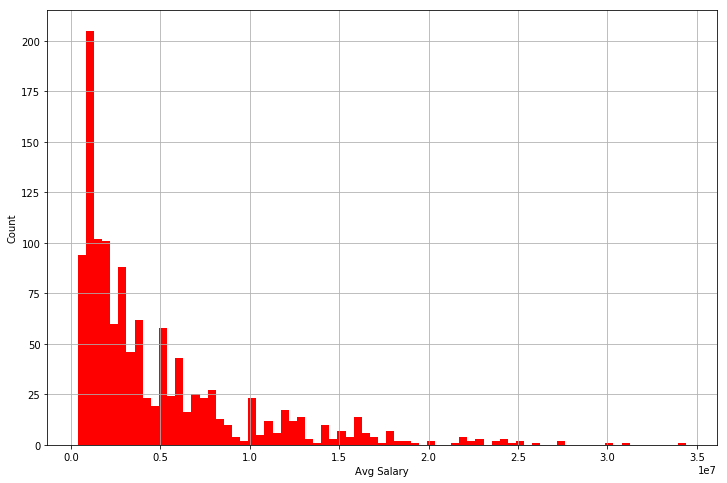

In [7]:
## Check distribution by Salary

plt.figure(figsize=(12, 8))
plt.hist(df['Salary'], bins=75, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

In [8]:
## Grasping the number of players who sign a FA contract by year

df.groupby('Yr').count()['Name']

Yr
2005    109
2006     81
2007     91
2009    215
2010     91
2011     88
2012    117
2013    120
2014    105
2015    119
2016     89
Name: Name, dtype: int64

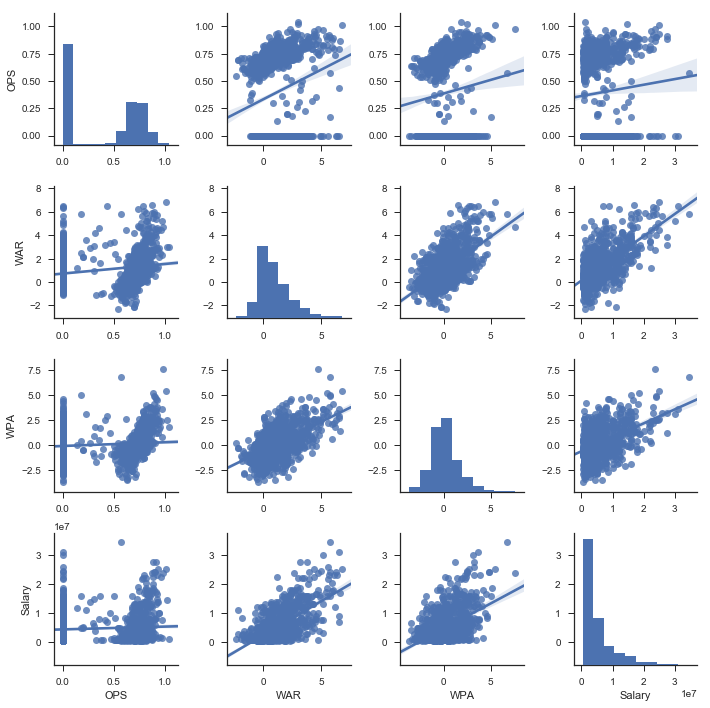

In [9]:
## Check the relationship between 'Salary' and the major indicators chosen among the various performance indicators by pairplot.

cols = ["OPS", "WAR", "WPA", "Salary"]
sns.set(style="ticks")
g = sns.pairplot(df[cols], kind="reg")

In [10]:
## Encoding Two Categorical Columns

def encode_df_x1(df):
    
    ## categorical variables of Yr
    df_yr_le = LabelEncoder()
    df['Yr'] = df_yr_le.fit_transform(df['Yr'])
    
    enc_dict_yr = {'Yr' : df_yr_le}
    
    return df, enc_dict_yr
    
def encode_df_x2(df):
    
    ## categorical variables of Team
    df_team_le = LabelEncoder()
    df['Team'] = df_team_le.fit_transform(df['Team'])
    
    enc_dict_team = {'Team' : df_team_le}
    
    return df, enc_dict_team

train_df_x1 = encode_df_x1(df)
train_df_x2 = encode_df_x2(df)

In [11]:
df.tail()

Name  Yr  Team    G     AB     PA    H_b   Hits  Doubles  \
1220      Trevor Plouffe  10    29   84  319.0  344.0   83.0   57.0     13.0   
1221          Tyson Ross  10    19    1    0.0    0.0    0.0    0.0      0.0   
1222  Welington Castillo  10    10  113  416.0  457.0  110.0   72.0     24.0   
1223        Wilson Ramos  10    17  131  482.0  523.0  148.0  101.0     25.0   
1224     Yoenis Cespedes  10    16  132  479.0  543.0  134.0   77.0     25.0   

      Triples  HR_b   R_b   RBI  BB_b  IBB_b   SO_b  BB_Percent  K_Percent  \
1220      1.0  12.0  35.0  47.0  19.0    0.0   60.0         5.5       17.4   
1221      0.0   0.0   0.0   0.0   0.0    0.0    0.0         0.0        0.0   
1222      0.0  14.0  41.0  68.0  33.0    3.0  121.0         7.2       26.5   
1223      0.0  22.0  58.0  80.0  35.0    2.0   79.0         6.7       15.1   
1224      1.0  31.0  72.0  86.0  51.0    8.0  108.0         9.4       19.9   

      BB_per_K  BABIP_b  HBP_b   SF   SH   GDP   SB   CS  Def    ISO   wOBA  \
1220      0.32    0.284    2.0  3.0  1.0  11.0  1.0  0.0 -8.4  0.160  0.311   
1221      0.00    0.000    0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000  0.000   
1222      0.27    0.337    4.0  4.0  0.0   5.0  2.0  0.0  9.8  0.159  0.319   
1223      0.44    0.327    2.0  4.0  0.0  17.0  0.0  0.0  8.4  0.189  0.361   
1224      0.47    0.298    7.0  6.0  0.0  14.0  3.0  1.0 -9.2  0.251  0.369   

      wRAA    AVG    OBP    SLG    OPS  WAR  wRC_Plus   WPA    W    L   GS  \
1220  -2.1  0.260  0.303  0.420  0.723 -0.4      91.0  0.50  0.0  0.0  0.0   
1221   0.0  0.000  0.000  0.000  0.000  0.1       0.0 -0.24  0.0  1.0  1.0   
1222   0.4  0.264  0.322  0.423  0.745  1.6      91.0  0.64  0.0  0.0  0.0   
1223  18.7  0.307  0.354  0.496  0.850  3.4     124.0  2.58  0.0  0.0  0.0   
1224  22.8  0.280  0.354  0.530  0.884  3.2     135.0  3.21  0.0  0.0  0.0   

       CG   IP  H_p  HR_p  BB_p  SO_p  R_p   SV   BS   BK   ER  HBP_p  HLD  \
1220  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0   
1221  0.0  5.1  9.0   0.0   1.0   5.0  8.0  0.0  0.0  0.0  7.0    2.0  0.0   
1222  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0   
1223  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0   
1224  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0   

      IBB_p  ShO   TBF   WP  HR_per_9  BB_per_9  K_per_9  K_per_BB  \
1220    0.0  0.0   0.0  0.0       0.0      0.00     0.00       0.0   
1221    0.0  0.0  27.0  1.0       0.0      1.69     8.44       5.0   
1222    0.0  0.0   0.0  0.0       0.0      0.00     0.00       0.0   
1223    0.0  0.0   0.0  0.0       0.0      0.00     0.00       0.0   
1224    0.0  0.0   0.0  0.0       0.0      0.00     0.00       0.0   

      K_BB_Percent  GB_Percent  HR_per_FB  LOB_Percent    ERA  BABIP_p   FIP  \
1220           0.0         0.0        0.0          0.0   0.00    0.000  0.00   
1221          14.8        47.4        0.0         33.3  11.81    0.474  2.96   
1222           0.0         0.0        0.0          0.0   0.00    0.000  0.00   
1223           0.0         0.0        0.0          0.0   0.00    0.000  0.00   
1224           0.0         0.0        0.0          0.0   0.00    0.000  0.00   

      WHIP  Contract_Yrs  Total_Salary      Salary  
1220  0.00           1.0     5250000.0   5250000.0  
1221  1.88           1.0     6000000.0   6000000.0  
1222  0.00           2.0    13000000.0   6500000.0  
1223  0.00           2.0    12500000.0   6250000.0  
1224  0.00           4.0   110000000.0  27500000.0

## * Splitting Dependent & Independent Variables

In [12]:
df_x = df.iloc[:, 1:69]

In [13]:
print(df_x.shape)
df_x.tail()

(1225, 68)


Yr  Team    G     AB     PA    H_b   Hits  Doubles  Triples  HR_b   R_b  \
1220  10    29   84  319.0  344.0   83.0   57.0     13.0      1.0  12.0  35.0   
1221  10    19    1    0.0    0.0    0.0    0.0      0.0      0.0   0.0   0.0   
1222  10    10  113  416.0  457.0  110.0   72.0     24.0      0.0  14.0  41.0   
1223  10    17  131  482.0  523.0  148.0  101.0     25.0      0.0  22.0  58.0   
1224  10    16  132  479.0  543.0  134.0   77.0     25.0      1.0  31.0  72.0   

       RBI  BB_b  IBB_b   SO_b  BB_Percent  K_Percent  BB_per_K  BABIP_b  \
1220  47.0  19.0    0.0   60.0         5.5       17.4      0.32    0.284   
1221   0.0   0.0    0.0    0.0         0.0        0.0      0.00    0.000   
1222  68.0  33.0    3.0  121.0         7.2       26.5      0.27    0.337   
1223  80.0  35.0    2.0   79.0         6.7       15.1      0.44    0.327   
1224  86.0  51.0    8.0  108.0         9.4       19.9      0.47    0.298   

      HBP_b   SF   SH   GDP   SB   CS  Def    ISO   wOBA  wRAA    AVG    OBP  \
1220    2.0  3.0  1.0  11.0  1.0  0.0 -8.4  0.160  0.311  -2.1  0.260  0.303   
1221    0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000  0.000   0.0  0.000  0.000   
1222    4.0  4.0  0.0   5.0  2.0  0.0  9.8  0.159  0.319   0.4  0.264  0.322   
1223    2.0  4.0  0.0  17.0  0.0  0.0  8.4  0.189  0.361  18.7  0.307  0.354   
1224    7.0  6.0  0.0  14.0  3.0  1.0 -9.2  0.251  0.369  22.8  0.280  0.354   

        SLG    OPS  WAR  wRC_Plus   WPA    W    L   GS   CG   IP  H_p  HR_p  \
1220  0.420  0.723 -0.4      91.0  0.50  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
1221  0.000  0.000  0.1       0.0 -0.24  0.0  1.0  1.0  0.0  5.1  9.0   0.0   
1222  0.423  0.745  1.6      91.0  0.64  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
1223  0.496  0.850  3.4     124.0  2.58  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
1224  0.530  0.884  3.2     135.0  3.21  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

      BB_p  SO_p  R_p   SV   BS   BK   ER  HBP_p  HLD  IBB_p  ShO   TBF   WP  \
1220   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   0.0  0.0   
1221   1.0   5.0  8.0  0.0  0.0  0.0  7.0    2.0  0.0    0.0  0.0  27.0  1.0   
1222   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   0.0  0.0   
1223   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   0.0  0.0   
1224   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   0.0  0.0   

      HR_per_9  BB_per_9  K_per_9  K_per_BB  K_BB_Percent  GB_Percent  \
1220       0.0      0.00     0.00       0.0           0.0         0.0   
1221       0.0      1.69     8.44       5.0          14.8        47.4   
1222       0.0      0.00     0.00       0.0           0.0         0.0   
1223       0.0      0.00     0.00       0.0           0.0         0.0   
1224       0.0      0.00     0.00       0.0           0.0         0.0   

      HR_per_FB  LOB_Percent    ERA  BABIP_p   FIP  WHIP  
1220        0.0          0.0   0.00    0.000  0.00  0.00  
1221        0.0         33.3  11.81    0.474  2.96  1.88  
1222        0.0          0.0   0.00    0.000  0.00  0.00  
1223        0.0          0.0   0.00    0.000  0.00  0.00  
1224        0.0          0.0   0.00    0.000  0.00  0.00

In [14]:
df_y = pd.DataFrame(df['Salary'])

print(df_y.shape)
df_y.tail()

(1225, 1)


Salary
1220   5250000.0
1221   6000000.0
1222   6500000.0
1223   6250000.0
1224  27500000.0

In [15]:
df_x_corr = df_x.corr()
df_x_corr.tail()

Yr      Team         G        AB        PA       H_b  \
LOB_Percent  0.085814 -0.004271 -0.737424 -0.834416 -0.833830 -0.805638   
ERA          0.045769  0.042912 -0.725933 -0.748055 -0.747715 -0.721790   
BABIP_p      0.087114  0.016844 -0.761655 -0.835046 -0.834625 -0.805748   
FIP          0.039577  0.017976 -0.754958 -0.801940 -0.801461 -0.774317   
WHIP         0.060169  0.025404 -0.760090 -0.820380 -0.819959 -0.791651   

                 Hits   Doubles   Triples      HR_b       R_b       RBI  \
LOB_Percent -0.792231 -0.771840 -0.454795 -0.634219 -0.772804 -0.752884   
ERA         -0.709549 -0.692196 -0.406944 -0.568412 -0.693166 -0.674748   
BABIP_p     -0.791750 -0.773324 -0.455416 -0.634966 -0.773858 -0.753235   
FIP         -0.761633 -0.741426 -0.436225 -0.609394 -0.742985 -0.723700   
WHIP        -0.778235 -0.759091 -0.446694 -0.623450 -0.760014 -0.739980   

                 BB_b     IBB_b      SO_b  BB_Percent  K_Percent  BB_per_K  \
LOB_Percent -0.728583 -0.448724 -0.776992   -0.854971  -0.794930 -0.818162   
ERA         -0.653501 -0.402022 -0.697168   -0.766132  -0.717353 -0.732783   
BABIP_p     -0.730240 -0.448738 -0.778565   -0.855142  -0.796807 -0.817683   
FIP         -0.700035 -0.431525 -0.746347   -0.821583  -0.764727 -0.786441   
WHIP        -0.716656 -0.440867 -0.764588   -0.840378  -0.785601 -0.803753   

              BABIP_b     HBP_b        SF        SH       GDP        SB  \
LOB_Percent -0.946350 -0.578303 -0.661015 -0.297222 -0.726020 -0.388487   
ERA         -0.850102 -0.517558 -0.594719 -0.281065 -0.648758 -0.350253   
BABIP_p     -0.946770 -0.577731 -0.662928 -0.303114 -0.723820 -0.391431   
FIP         -0.910081 -0.555665 -0.636904 -0.294577 -0.697865 -0.373688   
WHIP        -0.931809 -0.567642 -0.651367 -0.304416 -0.711951 -0.383589   

                   CS       Def       ISO      wOBA      wRAA       AVG  \
LOB_Percent -0.467588  0.137568 -0.846597 -0.957012 -0.078496 -0.952412   
ERA         -0.421636  0.115827 -0.759446 -0.858991 -0.071011 -0.855103   
BABIP_p     -0.471258  0.131785 -0.847632 -0.957507 -0.079166 -0.952791   
FIP         -0.449755  0.130386 -0.813420 -0.920101 -0.075676 -0.915870   
WHIP        -0.461698  0.129195 -0.832865 -0.941741 -0.077638 -0.937399   

                  OBP       SLG       OPS       WAR  wRC_Plus       WPA  \
LOB_Percent -0.958676 -0.942325 -0.954100 -0.072538 -0.914442  0.070023   
ERA         -0.860445 -0.845780 -0.856345 -0.151375 -0.819478 -0.168257   
BABIP_p     -0.959002 -0.942993 -0.954620 -0.083970 -0.914440 -0.029563   
FIP         -0.921775 -0.905882 -0.917279 -0.160558 -0.878751 -0.088718   
WHIP        -0.943315 -0.927316 -0.938862 -0.130022 -0.898617 -0.079183   

                    W         L        GS        CG        IP       H_p  \
LOB_Percent  0.641647  0.632923  0.446973  0.234548  0.711523  0.678969   
ERA          0.549611  0.671602  0.480246  0.216034  0.644028  0.667956   
BABIP_p      0.633915  0.680384  0.484102  0.246698  0.719539  0.715664   
FIP          0.608529  0.681231  0.493524  0.226093  0.695648  0.696624   
WHIP         0.604623  0.674946  0.476605  0.224019  0.694741  0.699218   

                 HR_p      BB_p      SO_p       R_p        SV        BS  \
LOB_Percent  0.648604  0.716588  0.734023  0.654048  0.311100  0.477719   
ERA          0.659471  0.690091  0.618575  0.707067  0.154051  0.339133   
BABIP_p      0.661457  0.734542  0.727968  0.708771  0.252911  0.437705   
FIP          0.711109  0.739194  0.669342  0.714439  0.198138  0.394011   
WHIP         0.658478  0.745249  0.685620  0.707603  0.219841  0.416907   

                   BK        ER     HBP_p       HLD     IBB_p       ShO  \
LOB_Percent  0.298027  0.653851  0.603393  0.484843  0.636549  0.207372   
ERA          0.302377  0.711192  0.590654  0.295164  0.559294  0.193712   
BABIP_p      0.308799  0.708692  0.620064  0.431702  0.643119  0.218322   
FIP          0.327762  0.715222  0.629403  0.367330  0.607533  0.202868   
WHIP         0.316

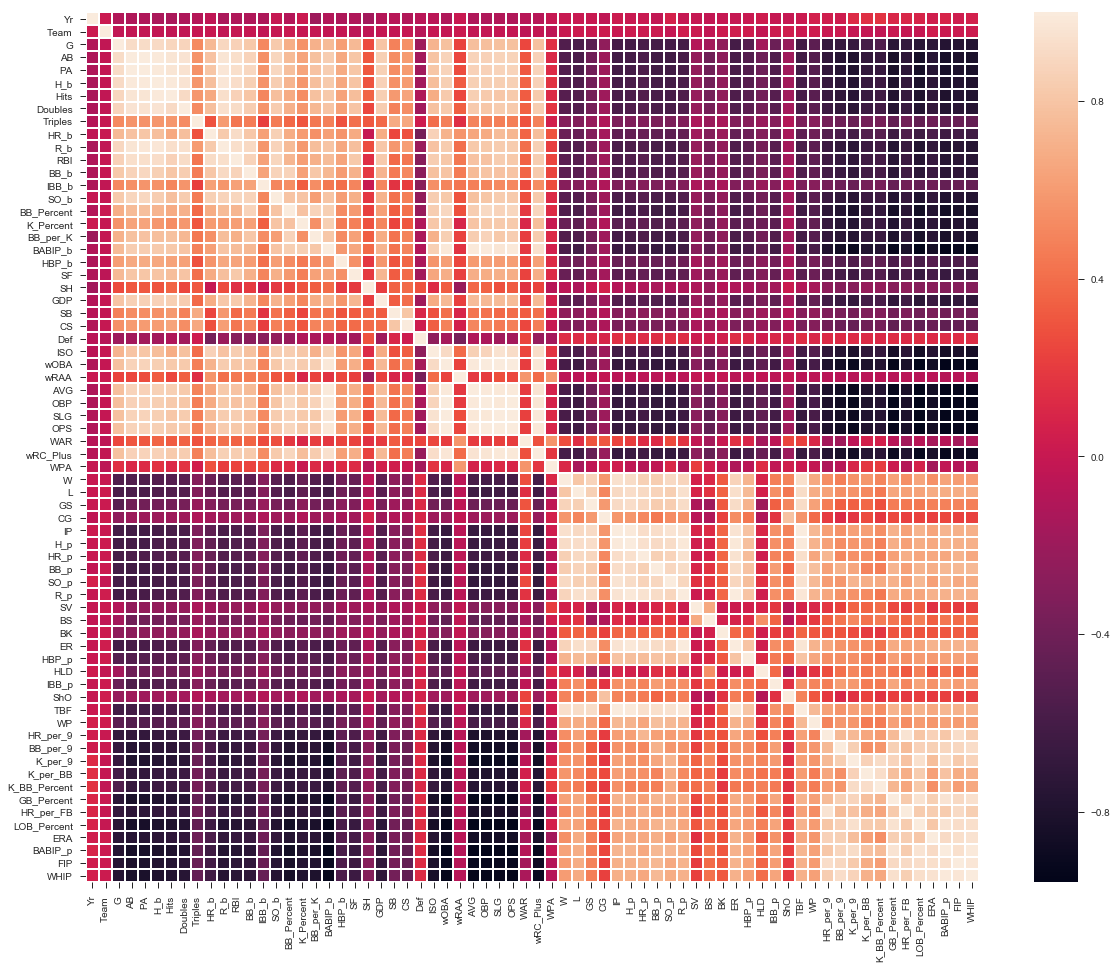

In [16]:
plt.figure(figsize=(20, 16))
corr_data = pd.DataFrame.corr(df_x)
sns.heatmap(corr_data, annot=False, linewidths=1)
plt.show()

## * Checking p-value using OLS Analysis

### * 1st OLS analysis

In [17]:
dfX1 = sm.add_constant(df_x)
dfY = pd.DataFrame(df_y, columns=["Salary"])
df_mlb = pd.concat([dfX1, dfY], axis=1)

In [18]:
model1 = sm.OLS(dfY, dfX1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     35.35
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          4.86e-234
Time:                        04:37:02   Log-Likelihood:                -19948.
No. Observations:                1225   AIC:                         4.003e+04
Df Residuals:                    1156   BIC:                         4.039e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.958e+06   1.21e+06      4.083   

## * Scaling the variables

In [19]:
cols = df_x.columns.tolist()

cat_cols = cols[:2]
num_cols = cols[2:70]

cat_cols_list = []
num_cols_list = []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols:
        cat_cols_list.append("C(" + item1 + ")")
        
    for item2 in num_cols:
        num_cols_list.append("scale(" + item2 + ")")
        
    return cat_cols_list, num_cols_list

converted_cols = r_style_cat_cols(cat_cols, num_cols)

converted_cols_list = " + ".join(cat_cols_list + num_cols_list)
model_str = "Salary ~ "

## zero; To eliminate Intercept of Scaling categorical valiable.
zero = ' + 0'

ols_str_list = model_str + converted_cols_list + zero
merging_converted_cols = cat_cols_list + num_cols_list

# print(ols_str_list)
# print(converted_cols_list)
# print(converted_cols)

### * 2nd OLS analysis (Not include 'ZERO')

In [20]:
dfX2 = dmatrix(converted_cols_list, data=df_x)
dfX2_columns = dfX2.design_info.column_names
dfX2 = pd.DataFrame(dfX2, columns=dfX2_columns)

In [21]:
model2 = sm.OLS(dfY, dfX2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     23.71
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          5.67e-220
Time:                        04:37:02   Log-Likelihood:                -19911.
No. Observations:                1225   AIC:                         4.004e+04
Df Residuals:                    1117   BIC:                         4.059e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             5.77e+06    

## * 1st Pre-processing Variables of model2 that failed the 5% P-VALUE Condition test

In [22]:
def extracted_pvals(result, cond):
    pvals = pd.DataFrame(result.pvalues)
    pvals.columns = ['P_values']
    pvals['P_values'] = pvals[pvals.P_values < cond]
    pvals = pvals.dropna().sort_values('P_values')
    
    return pvals

In [23]:
p_values3 = extracted_pvals(result2, 0.05)
# print(len(p_values))
# print(p_values)

extracted_features3 = list(p_values3.index.values)
extracted_df_x3 = dfX2.loc[:, extracted_features3]

extracted_df_x3.tail()

scale(G)  scale(SV)  scale(IBB_b)  scale(GDP)  scale(SB)  C(Yr)[T.10]  \
1220  0.130796  -0.271484     -0.476154    1.153062  -0.269710          1.0   
1221 -1.755004  -0.271484     -0.476154   -0.769897  -0.421406          1.0   
1222  0.789689  -0.271484      0.596068    0.104175  -0.118014          1.0   
1223  1.198658  -0.271484      0.238661    2.201948  -0.421406          1.0   
1224  1.221379  -0.271484      2.383106    1.677505   0.033683          1.0   

      scale(WAR)  scale(wRAA)  scale(SO_p)  C(Yr)[T.9]  scale(HR_p)  \
1220   -1.008703    -0.318475    -0.715004         0.0    -0.648139   
1221   -0.658062    -0.084996    -0.609591         0.0    -0.648139   
1222    0.393864    -0.040524    -0.715004         0.0    -0.648139   
1223    1.656174     1.994078    -0.715004         0.0    -0.648139   
1224    1.515917     2.449918    -0.715004         0.0    -0.648139   

      scale(SLG)  scale(ER)  scale(BK)  scale(OPS)  C(Yr)[T.1]  scale(OBP)  \
1220    0.993282  -0.672842  -0.299392    0.912641         0.0    0.800426   
1221   -1.037828  -0.431779  -0.299392   -1.051964         0.0   -1.058482   
1222    1.007790  -0.672842  -0.299392    0.972422         0.0    0.916991   
1223    1.360816  -0.672842  -0.299392    1.257738         0.0    1.113311   
1224    1.525240  -0.672842  -0.299392    1.350126         0.0    1.113311   

      scale(BB_per_9)  
1220        -0.850686  
1221         0.083349  
1222        -0.850686  
1223        -0.850686  
1224        -0.850686

### * 3-1 OLS analysis

In [24]:
dfX3_1 = sm.add_constant(extracted_df_x3)

model3_1 = sm.OLS(dfY, dfX3_1)
result3_1 = model3_1.fit()
print(result3_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     105.4
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          3.21e-232
Time:                        04:37:03   Log-Likelihood:                -20058.
No. Observations:                1225   AIC:                         4.015e+04
Df Residuals:                    1206   BIC:                         4.025e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.511e+06   1.03e+05     

## * 2nd Pre-processing Variables of model3-1 that failed the 1% P-VALUE Condition test

In [25]:
p_values3_1 = extracted_pvals(result3_1, 0.05)

extracted_features3_1 = p_values3_1.index.values
extracted_df_x3_1 = dfX3_1.loc[:, extracted_features3_1]

dfX3_1_1 = sm.add_constant(extracted_df_x3_1)

model3_1_1 = sm.OLS(dfY, dfX3_1_1)
result3_1_1 = model3_1_1.fit()
print(result3_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     111.4
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          6.33e-233
Time:                        04:37:03   Log-Likelihood:                -20059.
No. Observations:                1225   AIC:                         4.015e+04
Df Residuals:                    1207   BIC:                         4.025e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.547e+06   9.92e+04     

### * 2-2 OLS analysis (Include 'ZERO')
#### [zero; Constant Term to eliminate Intercept of Scaling categorical valiable]

In [26]:
ols_str_list

'Salary ~ C(Yr) + C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

In [27]:
model2_2 = sm.OLS.from_formula(ols_str_list, df)
result2_2 = model2_2.fit()
print(result2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     23.71
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          5.67e-220
Time:                        04:37:03   Log-Likelihood:                -19911.
No. Observations:                1225   AIC:                         4.004e+04
Df Residuals:                    1117   BIC:                         4.059e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Yr)[0]              5.77e+06    

## * 1st Pre-processing Variables of model2-2 that failed the 5% P-VALUE Condition test

In [28]:
df_x_copy = df_x.copy()
df_x_copy_list = list(df_x_copy.columns)
df_x_conv_list = cat_cols_list + num_cols_list

for item, item2 in zip(df_x_copy_list, df_x_conv_list):
    df_x_copy.rename(columns={item : item2}, inplace=True)
        
df_x_copy.tail()

C(Yr)  C(Team)  scale(G)  scale(AB)  scale(PA)  scale(H_b)  scale(Hits)  \
1220     10       29        84      319.0      344.0        83.0         57.0   
1221     10       19         1        0.0        0.0         0.0          0.0   
1222     10       10       113      416.0      457.0       110.0         72.0   
1223     10       17       131      482.0      523.0       148.0        101.0   
1224     10       16       132      479.0      543.0       134.0         77.0   

      scale(Doubles)  scale(Triples)  scale(HR_b)  scale(R_b)  scale(RBI)  \
1220            13.0             1.0         12.0        35.0        47.0   
1221             0.0             0.0          0.0         0.0         0.0   
1222            24.0             0.0         14.0        41.0        68.0   
1223            25.0             0.0         22.0        58.0        80.0   
1224            25.0             1.0         31.0        72.0        86.0   

      scale(BB_b)  scale(IBB_b)  scale(SO_b)  scale(BB_Percent)  \
1220         19.0           0.0         60.0                5.5   
1221          0.0           0.0          0.0                0.0   
1222         33.0           3.0        121.0                7.2   
1223         35.0           2.0         79.0                6.7   
1224         51.0           8.0        108.0                9.4   

      scale(K_Percent)  scale(BB_per_K)  scale(BABIP_b)  scale(HBP_b)  \
1220              17.4             0.32           0.284           2.0   
1221               0.0             0.00           0.000           0.0   
1222              26.5             0.27           0.337           4.0   
1223              15.1             0.44           0.327           2.0   
1224              19.9             0.47           0.298           7.0   

      scale(SF)  scale(SH)  scale(GDP)  scale(SB)  scale(CS)  scale(Def)  \
1220        3.0        1.0        11.0        1.0        0.0        -8.4   
1221        0.0        0.0         0.0        0.0        0.0         0.0   
1222        4.0        0.0         5.0        2.0        0.0         9.8   
1223        4.0        0.0        17.0        0.0        0.0         8.4   
1224        6.0        0.0        14.0        3.0        1.0        -9.2   

      scale(ISO)  scale(wOBA)  scale(wRAA)  scale(AVG)  scale(OBP)  \
1220       0.160        0.311         -2.1       0.260       0.303   
1221       0.000        0.000          0.0       0.000       0.000   
1222       0.159        0.319          0.4       0.264       0.322   
1223       0.189        0.361         18.7       0.307       0.354   
1224       0.251        0.369         22.8       0.280       0.354   

      scale(SLG)  scale(OPS)  scale(WAR)  scale(wRC_Plus)  scale(WPA)  \
1220       0.420       0.723        -0.4             91.0        0.50   
1221       0.000       0.000         0.1              0.0       -0.24   
1222       0.423       0.745         1.6             91.0        0.64   
1223       0.496       0.850         3.4            124.0        2.58   
1224       0.530       0.884         3.2            135.0        3.21   

      scale(W)  scale(L)  scale(GS)  scale(CG)  scale(IP)  scale(H_p)  \
1220       0.0       0.0        0.0        0.0        0.0         0.0   
1221       0.0       1.0        1.0        0.0        5.1         9.0   
1222       0.0       0.0        0.0        0.0        0.0         0.0   
1223       0.0       0.0        0.0        0.0        0.0         0.0   
1224       0.0       0.0        0.0        0.0        0.0         0.0   

      scale(HR_p)  scale(BB_p)  scale(SO_p)  scale(R_p)  scale(SV)  scale(BS)  \
1220          0.0          0.0          0.0         0.0        0.0        0.0   
1221          0.0          1.0          5.0         8.0        0.0        0.0   
1222          0.0          0.0          0.0         0.0        0.0        0.0   
1223          0.0          0.0          0.0         0.0        0.0        0.0   
1224          0.0          0.0          0.0         0

In [29]:
ols_model_2_2_join = " + ".join(df_x_copy.columns)
ols_model_2_2_list = ols_model_2_2_join + zero
ols_model_2_2_list

'C(Yr) + C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

In [30]:
dfX3_2 = dmatrix(ols_model_2_2_list, data=df_x)
dfX3_2_columns = dfX3_2.design_info.column_names
dfX3_2 = pd.DataFrame(dfX3_2, columns=dfX3_2_columns)

In [31]:
p_values3_2 = extracted_pvals(result2_2, 0.05)
# # print(len(p_values3_2))
# print(p_values3_2)

extracted_features3_2 = list(p_values3_2.index.values)
extracted_df_x3_2 = dfX3_2.loc[:, extracted_features3_2]

extracted_df_x3_2.tail()

scale(G)  scale(SV)  scale(IBB_b)  scale(GDP)  scale(SB)  scale(WAR)  \
1220  0.130796  -0.271484     -0.476154    1.153062  -0.269710   -1.008703   
1221 -1.755004  -0.271484     -0.476154   -0.769897  -0.421406   -0.658062   
1222  0.789689  -0.271484      0.596068    0.104175  -0.118014    0.393864   
1223  1.198658  -0.271484      0.238661    2.201948  -0.421406    1.656174   
1224  1.221379  -0.271484      2.383106    1.677505   0.033683    1.515917   

      scale(wRAA)  scale(SO_p)  scale(HR_p)  scale(SLG)  C(Yr)[10]  C(Yr)[9]  \
1220    -0.318475    -0.715004    -0.648139    0.993282        1.0       0.0   
1221    -0.084996    -0.609591    -0.648139   -1.037828        1.0       0.0   
1222    -0.040524    -0.715004    -0.648139    1.007790        1.0       0.0   
1223     1.994078    -0.715004    -0.648139    1.360816        1.0       0.0   
1224     2.449918    -0.715004    -0.648139    1.525240        1.0       0.0   

      scale(ER)  scale(BK)  C(Yr)[1]  scale(OPS)  C(Yr)[8]  C(Yr)[7]  \
1220  -0.672842  -0.299392       0.0    0.912641       0.0       0.0   
1221  -0.431779  -0.299392       0.0   -1.051964       0.0       0.0   
1222  -0.672842  -0.299392       0.0    0.972422       0.0       0.0   
1223  -0.672842  -0.299392       0.0    1.257738       0.0       0.0   
1224  -0.672842  -0.299392       0.0    1.350126       0.0       0.0   

      C(Yr)[2]  scale(OBP)  C(Yr)[6]  scale(BB_per_9)  
1220       0.0    0.800426       0.0        -0.850686  
1221       0.0   -1.058482       0.0         0.083349  
1222       0.0    0.916991       0.0        -0.850686  
1223       0.0    1.113311       0.0        -0.850686  
1224       0.0    1.113311       0.0        -0.850686

### * 3-2 OLS analysis 

In [32]:
dfX3_2 = sm.add_constant(extracted_df_x3_2)

model3_2 = sm.OLS(dfY, dfX3_2)
result3_2 = model3_2.fit()
print(result3_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     89.59
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          7.13e-235
Time:                        04:37:04   Log-Likelihood:                -20043.
No. Observations:                1225   AIC:                         4.013e+04
Df Residuals:                    1202   BIC:                         4.025e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.039e+06   1.41e+05     

## * 2nd Pre-processing Variables of model3-2 that failed the 5% P-VALUE Condition test

In [33]:
p_values3_2_2 = extracted_pvals(result3_2, 0.05)
extracted_features3_2_2 = list(p_values3_2_2.index.values)
extracted_df_x3_2_2 = dfX3_2.loc[:, extracted_features3_2_2]

extracted_df_x3_2_2.tail()

const  scale(SO_p)  scale(WAR)  scale(GDP)  scale(IBB_b)  C(Yr)[10]  \
1220    1.0    -0.715004   -1.008703    1.153062     -0.476154        1.0   
1221    1.0    -0.609591   -0.658062   -0.769897     -0.476154        1.0   
1222    1.0    -0.715004    0.393864    0.104175      0.596068        1.0   
1223    1.0    -0.715004    1.656174    2.201948      0.238661        1.0   
1224    1.0    -0.715004    1.515917    1.677505      2.383106        1.0   

      scale(SB)  scale(SV)  C(Yr)[9]  scale(ER)  scale(wRAA)  C(Yr)[8]  \
1220  -0.269710  -0.271484       0.0  -0.672842    -0.318475       0.0   
1221  -0.421406  -0.271484       0.0  -0.431779    -0.084996       0.0   
1222  -0.118014  -0.271484       0.0  -0.672842    -0.040524       0.0   
1223  -0.421406  -0.271484       0.0  -0.672842     1.994078       0.0   
1224   0.033683  -0.271484       0.0  -0.672842     2.449918       0.0   

      scale(G)  C(Yr)[7]  scale(SLG)  scale(OPS)  scale(OBP)  scale(HR_p)  \
1220  0.130796       0.0    0.993282    0.912641    0.800426    -0.648139   
1221 -1.755004       0.0   -1.037828   -1.051964   -1.058482    -0.648139   
1222  0.789689       0.0    1.007790    0.972422    0.916991    -0.648139   
1223  1.198658       0.0    1.360816    1.257738    1.113311    -0.648139   
1224  1.221379       0.0    1.525240    1.350126    1.113311    -0.648139   

      C(Yr)[6]  scale(BB_per_9)  C(Yr)[1]  scale(BK)  
1220       0.0        -0.850686       0.0  -0.299392  
1221       0.0         0.083349       0.0  -0.299392  
1222       0.0        -0.850686       0.0  -0.299392  
1223       0.0        -0.850686       0.0  -0.299392  
1224       0.0        -0.850686       0.0  -0.299392

### * 3-2-2 OLS analysis 

In [34]:
dfX3_2_2 = sm.add_constant(extracted_df_x3_2_2)

model3_2_2 = sm.OLS(dfY, dfX3_2_2)
result3_2_2 = model3_2_2.fit()
print(result3_2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     93.77
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          1.36e-235
Time:                        04:37:04   Log-Likelihood:                -20043.
No. Observations:                1225   AIC:                         4.013e+04
Df Residuals:                    1203   BIC:                         4.024e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              4.1e+06    1.3e+05     

## * Eliminating Outliers of 3-2-2 OLS analysis RESULT

In [35]:
def elim_outliers(result):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX3_2_2.columns) - 1)
    idx = np.where(cooks_d2 > fox_cr)[0]
    
    return idx

In [36]:
idx = elim_outliers(result3_2_2)
print(idx, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx)))

[   7   11   13   19   36   41   66   72  113  115  118  119  132  137  141
  144  155  157  174  187  202  207  220  244  248  252  270  272  304  382
  391  393  397  401  405  411  416  438  457  460  462  499  502  539  549
  558  571  605  696  737  747  753  766  773  782  785  791  800  804  814
  826  837  903  914  953  958  976  983  993 1000 1017 1020 1036 1049 1059
 1073 1077 1088 1091 1096 1106 1135 1164 1169 1171 1180 1183 1188 1199 1202
 1209 1224] 

There are '92' Outliers according to Fox criteria


In [37]:
dfX3_2_2_idx = dfX3_2_2.drop(idx)
dfY_idx = dfY.drop(idx)

In [38]:
print(dfX3_2_2_idx.shape, dfY_idx.shape)

(1133, 22) (1133, 1)


### * 4th OLS analysis (Outliers Elim version of 3-2-2 model)

In [39]:
dfX4_idx_elimVer = sm.add_constant(dfX3_2_2_idx)

model4_idx_elimVer = sm.OLS(dfY_idx, dfX4_idx_elimVer)
result4_idx_elimVer = model4_idx_elimVer.fit()
print(result4_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     98.44
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          5.26e-236
Time:                        04:37:04   Log-Likelihood:                -18198.
No. Observations:                1133   AIC:                         3.644e+04
Df Residuals:                    1111   BIC:                         3.655e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.965e+06   9.95e+04     

## * Pre-processing Variables of model4 that failed the 5% P-VALUE Condition test

In [40]:
p_values4 = extracted_pvals(result4_idx_elimVer, 0.05)
extracted_features4 = p_values4.index.values
extracted_df_x4 = dfX4_idx_elimVer.loc[:, extracted_features4]
extracted_df_x4.tail()

const  scale(WAR)  scale(SO_p)  scale(GDP)  scale(IBB_b)  C(Yr)[10]  \
1219    1.0   -0.728190     0.676453   -0.769897     -0.476154        1.0   
1220    1.0   -1.008703    -0.715004    1.153062     -0.476154        1.0   
1221    1.0   -0.658062    -0.609591   -0.769897     -0.476154        1.0   
1222    1.0    0.393864    -0.715004    0.104175      0.596068        1.0   
1223    1.0    1.656174    -0.715004    2.201948      0.238661        1.0   

      scale(ER)  scale(SV)  scale(SB)  scale(wRAA)  C(Yr)[9]  C(Yr)[8]  \
1219   0.015912  -0.271484  -0.421406    -0.084996       0.0       0.0   
1220  -0.672842  -0.271484  -0.269710    -0.318475       0.0       0.0   
1221  -0.431779  -0.271484  -0.421406    -0.084996       0.0       0.0   
1222  -0.672842  -0.271484  -0.118014    -0.040524       0.0       0.0   
1223  -0.672842  -0.271484  -0.421406     1.994078       0.0       0.0   

      scale(G)  C(Yr)[7]  scale(HR_p)  
1219 -0.641700       0.0     0.291153  
1220  0.130796       0.0    -0.648139  
1221 -1.755004       0.0    -0.648139  
1222  0.789689       0.0    -0.648139  
1223  1.198658       0.0    -0.648139

## * 4-1 OLS analysis

In [41]:
dfX4_idx_elimVer = sm.add_constant(extracted_df_x4)

model4_idx_elimVer_filt = sm.OLS(dfY_idx, dfX4_idx_elimVer)
result4_idx_elimVer_filt = model4_idx_elimVer_filt.fit()
print(result4_idx_elimVer_filt.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     144.9
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          2.07e-239
Time:                        04:37:04   Log-Likelihood:                -18207.
No. Observations:                1133   AIC:                         3.644e+04
Df Residuals:                    1118   BIC:                         3.652e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.065e+06   8.66e+04     46.947   

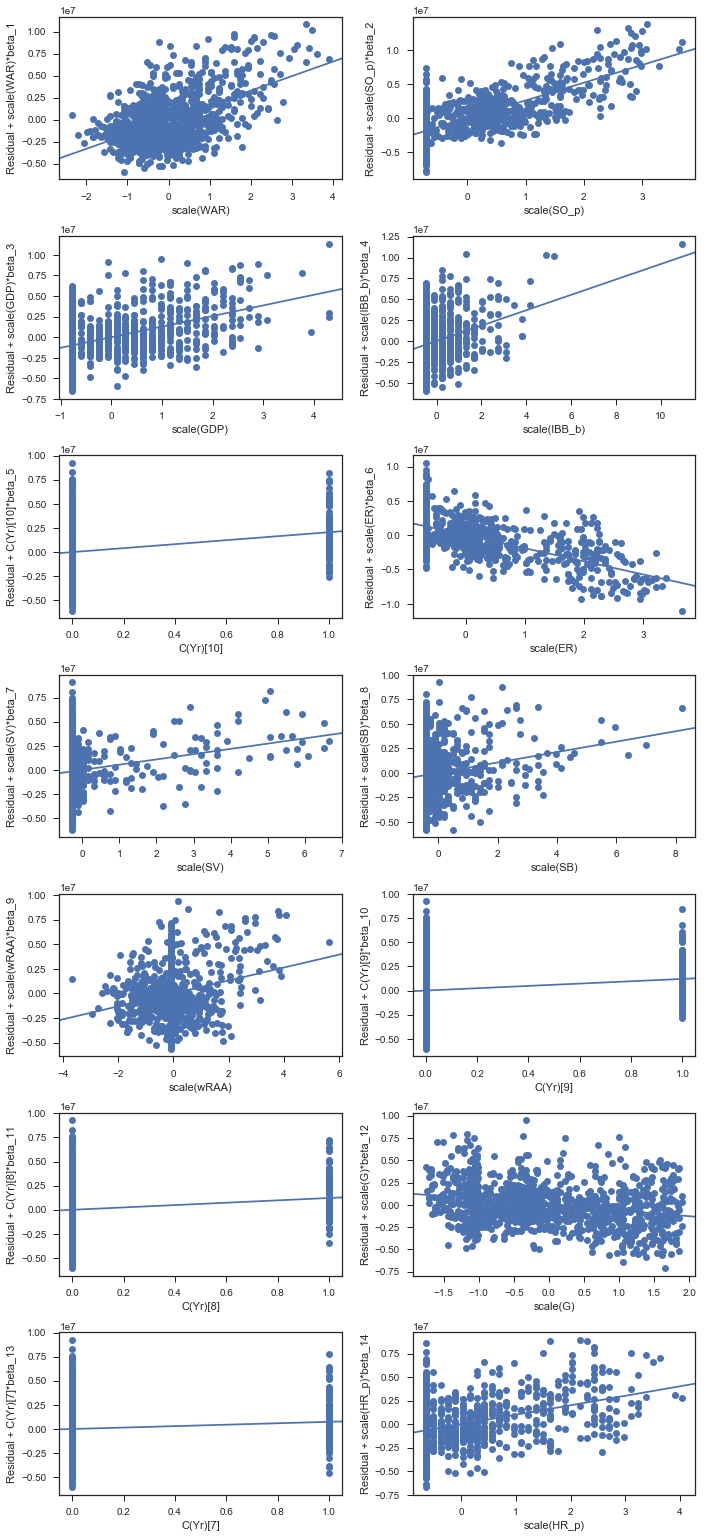

In [42]:
fig = plt.figure(figsize=(10, 25))
sm.graphics.plot_ccpr_grid(result4_idx_elimVer_filt, fig=fig)
fig.suptitle("")
plt.show()

## * Trying to another OLS Modeling

## 1. Numeric Variables ONLY

In [43]:
converted_num_ols = " + ".join(num_cols_list)

num_ols_model = model_str + converted_num_ols
num_ols_model

'Salary ~ scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP)'

### * 5th OLS analysis

In [44]:
model5 = sm.OLS.from_formula(num_ols_model, df)
result5 = model5.fit()
print(result5.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     35.19
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          1.04e-229
Time:                        04:37:07   Log-Likelihood:                -19963.
No. Observations:                1225   AIC:                         4.006e+04
Df Residuals:                    1158   BIC:                         4.040e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.817e+06    

## * 1st Filtrating P-VALUE under 5% of 5th OLS model

In [45]:
dfX5 = dmatrix(converted_num_ols, data=df_x)
dfX_columns5 = dfX5.design_info.column_names
dfX5 = pd.DataFrame(dfX5, columns=dfX_columns5)

In [46]:
p_values5 = extracted_pvals(result5, 0.05)

extracted_features5 = list(p_values5.index.values)
extracted_df_x5 = dfX5.loc[:, extracted_features5]

print(extracted_df_x5.shape)
extracted_df_x5.tail()

(1225, 21)


Intercept  scale(wRAA)  scale(G)  scale(SV)  scale(GDP)  scale(SO_p)  \
1220        1.0    -0.318475  0.130796  -0.271484    1.153062    -0.715004   
1221        1.0    -0.084996 -1.755004  -0.271484   -0.769897    -0.609591   
1222        1.0    -0.040524  0.789689  -0.271484    0.104175    -0.715004   
1223        1.0     1.994078  1.198658  -0.271484    2.201948    -0.715004   
1224        1.0     2.449918  1.221379  -0.271484    1.677505    -0.715004   

      scale(SB)  scale(WAR)  scale(wOBA)  scale(IBB_b)  scale(HR_p)  \
1220  -0.269710   -1.008703     0.881984     -0.476154    -0.648139   
1221  -0.421406   -0.658062    -1.056148     -0.476154    -0.648139   
1222  -0.118014    0.393864     0.931840      0.596068    -0.648139   
1223  -0.421406    1.656174     1.193581      0.238661    -0.648139   
1224   0.033683    1.515917     1.243437      2.383106    -0.648139   

      scale(SLG)  scale(BK)  scale(OBP)  scale(W)  scale(IBB_p)  scale(OPS)  \
1220    0.993282  -0.299392    0.800426 -0.628874     -0.625037    0.912641   
1221   -1.037828  -0.299392   -1.058482 -0.628874     -0.625037   -1.051964   
1222    1.007790  -0.299392    0.916991 -0.628874     -0.625037    0.972422   
1223    1.360816  -0.299392    1.113311 -0.628874     -0.625037    1.257738   
1224    1.525240  -0.299392    1.113311 -0.628874     -0.625037    1.350126   

      scale(K_Percent)  scale(K_per_9)  scale(BABIP_b)  scale(BB_per_9)  
1220          0.680057       -0.897374        0.861173        -0.850686  
1221         -0.949117        1.241561       -1.059341         0.083349  
1222          1.532096       -0.897374        1.219578        -0.850686  
1223          0.464706       -0.897374        1.151955        -0.850686  
1224          0.914134       -0.897374        0.955846        -0.850686

### * 6th OLS analysis

In [47]:
dfX6 = sm.add_constant(extracted_df_x5)

model6 = sm.OLS(dfY, dfX6)
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     88.64
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          6.40e-220
Time:                        04:37:07   Log-Likelihood:                -20083.
No. Observations:                1225   AIC:                         4.021e+04
Df Residuals:                    1204   BIC:                         4.031e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.817e+06   9.19e+04  

## * 2nd Filtrating P-VALUE under 5% of 6th OLS model

In [48]:
p_values6 = extracted_pvals(result6, 0.05)

extracted_features6 = list(p_values6.index.values)
extracted_df_x6 = dfX6.loc[:, extracted_features6]

print(extracted_df_x6.shape)
extracted_df_x6.tail()

(1225, 17)


Intercept  scale(GDP)  scale(SO_p)  scale(WAR)  scale(SB)  scale(wRAA)  \
1220        1.0    1.153062    -0.715004   -1.008703  -0.269710    -0.318475   
1221        1.0   -0.769897    -0.609591   -0.658062  -0.421406    -0.084996   
1222        1.0    0.104175    -0.715004    0.393864  -0.118014    -0.040524   
1223        1.0    2.201948    -0.715004    1.656174  -0.421406     1.994078   
1224        1.0    1.677505    -0.715004    1.515917   0.033683     2.449918   

      scale(SV)  scale(IBB_p)  scale(IBB_b)  scale(HR_p)  scale(BB_per_9)  \
1220  -0.271484     -0.625037     -0.476154    -0.648139        -0.850686   
1221  -0.271484     -0.625037     -0.476154    -0.648139         0.083349   
1222  -0.271484     -0.625037      0.596068    -0.648139        -0.850686   
1223  -0.271484     -0.625037      0.238661    -0.648139        -0.850686   
1224  -0.271484     -0.625037      2.383106    -0.648139        -0.850686   

      scale(K_Percent)  scale(BABIP_b)  scale(G)  scale(SLG)  scale(OBP)  \
1220          0.680057        0.861173  0.130796    0.993282    0.800426   
1221         -0.949117       -1.059341 -1.755004   -1.037828   -1.058482   
1222          1.532096        1.219578  0.789689    1.007790    0.916991   
1223          0.464706        1.151955  1.198658    1.360816    1.113311   
1224          0.914134        0.955846  1.221379    1.525240    1.113311   

      scale(OPS)  
1220    0.912641  
1221   -1.051964  
1222    0.972422  
1223    1.257738  
1224    1.350126

### * 7th OLS analysis

In [49]:
dfX7 = sm.add_constant(extracted_df_x6)

model7 = sm.OLS(dfY, dfX7)
result7 = model7.fit()
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     109.9
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          3.83e-222
Time:                        04:37:07   Log-Likelihood:                -20087.
No. Observations:                1225   AIC:                         4.021e+04
Df Residuals:                    1208   BIC:                         4.029e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.817e+06   9.21e+04  

## 2. Categorical Variable(Yr) + Numeric Variables + ZERO

In [50]:
yr_str = 'C(Yr) + '

cat_num_ols_list = model_str + yr_str + converted_num_ols + zero
cat_num_ols_list

'Salary ~ C(Yr) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

### * 8th OLS analysis

In [51]:
model8 = sm.OLS.from_formula(cat_num_ols_list, df)
result8 = model8.fit()
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     32.76
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          7.43e-235
Time:                        04:37:08   Log-Likelihood:                -19931.
No. Observations:                1225   AIC:                         4.002e+04
Df Residuals:                    1148   BIC:                         4.041e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Yr)[0]             4.356e+06   3

## * 1st Filtrating P-VALUE under 5% of 8th OLS model

In [52]:
filtration_str_list = yr_str + converted_num_ols + zero

dfX8 = dmatrix(filtration_str_list, data=df_x)
dfX_columns8 = dfX8.design_info.column_names
dfX8 = pd.DataFrame(dfX8, columns=dfX_columns8)

In [53]:
p_values8 = extracted_pvals(result8, 0.05)

extracted_features8 = list(p_values8.index.values)
extracted_df_x8 = dfX8.loc[:, extracted_features8]

print(extracted_df_x8.shape)
extracted_df_x8.tail()

(1225, 30)


C(Yr)[9]  C(Yr)[10]  C(Yr)[3]  C(Yr)[7]  C(Yr)[6]  C(Yr)[8]  C(Yr)[0]  \
1220       0.0        1.0       0.0       0.0       0.0       0.0       0.0   
1221       0.0        1.0       0.0       0.0       0.0       0.0       0.0   
1222       0.0        1.0       0.0       0.0       0.0       0.0       0.0   
1223       0.0        1.0       0.0       0.0       0.0       0.0       0.0   
1224       0.0        1.0       0.0       0.0       0.0       0.0       0.0   

      C(Yr)[1]  C(Yr)[2]  C(Yr)[4]  C(Yr)[5]  scale(G)  scale(SV)  \
1220       0.0       0.0       0.0       0.0  0.130796  -0.271484   
1221       0.0       0.0       0.0       0.0 -1.755004  -0.271484   
1222       0.0       0.0       0.0       0.0  0.789689  -0.271484   
1223       0.0       0.0       0.0       0.0  1.198658  -0.271484   
1224       0.0       0.0       0.0       0.0  1.221379  -0.271484   

      scale(IBB_b)  scale(GDP)  scale(WAR)  scale(SB)  scale(wRAA)  \
1220     -0.476154    1.153062   -1.008703  -0.269710    -0.318475   
1221     -0.476154   -0.769897   -0.658062  -0.421406    -0.084996   
1222      0.596068    0.104175    0.393864  -0.118014    -0.040524   
1223      0.238661    2.201948    1.656174  -0.421406     1.994078   
1224      2.383106    1.677505    1.515917   0.033683     2.449918   

      scale(SO_p)  scale(HR_p)  scale(SLG)  scale(BK)  scale(OPS)  scale(ER)  \
1220    -0.715004    -0.648139    0.993282  -0.299392    0.912641  -0.672842   
1221    -0.609591    -0.648139   -1.037828  -0.299392   -1.051964  -0.431779   
1222    -0.715004    -0.648139    1.007790  -0.299392    0.972422  -0.672842   
1223    -0.715004    -0.648139    1.360816  -0.299392    1.257738  -0.672842   
1224    -0.715004    -0.648139    1.525240  -0.299392    1.350126  -0.672842   

      scale(K_Percent)  scale(BB_per_9)  scale(OBP)  scale(W)  scale(BABIP_b)  \
1220          0.680057        -0.850686    0.800426 -0.628874        0.861173   
1221         -0.949117         0.083349   -1.058482 -0.628874       -1.059341   
1222          1.532096        -0.850686    0.916991 -0.628874        1.219578   
1223          0.464706        -0.850686    1.113311 -0.628874        1.151955   
1224          0.914134        -0.850686    1.113311 -0.628874        0.955846   

      scale(IBB_p)  
1220     -0.625037  
1221     -0.625037  
1222     -0.625037  
1223     -0.625037  
1224     -0.625037

### * 9th OLS analysis

In [54]:
dfX9 = sm.add_constant(extracted_df_x8)

model9 = sm.OLS(dfY, dfX9)
result9 = model9.fit()
print(result9.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     71.68
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          1.05e-237
Time:                        04:37:09   Log-Likelihood:                -20020.
No. Observations:                1225   AIC:                         4.010e+04
Df Residuals:                    1195   BIC:                         4.025e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.502e+06   8.31e+04  

## * 2nd Filtrating P-VALUE under 5% of 9th OLS model

In [55]:
p_values9 = extracted_pvals(result9, 0.05)

extracted_features9 = list(p_values9.index.values)
extracted_df_x9 = dfX9.loc[:, extracted_features9]

print(extracted_df_x9.shape)
extracted_df_x9.tail()

(1225, 24)


const  scale(WAR)  scale(GDP)  scale(SO_p)  scale(IBB_b)  scale(SB)  \
1220    1.0   -1.008703    1.153062    -0.715004     -0.476154  -0.269710   
1221    1.0   -0.658062   -0.769897    -0.609591     -0.476154  -0.421406   
1222    1.0    0.393864    0.104175    -0.715004      0.596068  -0.118014   
1223    1.0    1.656174    2.201948    -0.715004      0.238661  -0.421406   
1224    1.0    1.515917    1.677505    -0.715004      2.383106   0.033683   

      scale(SV)  scale(ER)  C(Yr)[10]  C(Yr)[9]  scale(wRAA)  C(Yr)[8]  \
1220  -0.271484  -0.672842        1.0       0.0    -0.318475       0.0   
1221  -0.271484  -0.431779        1.0       0.0    -0.084996       0.0   
1222  -0.271484  -0.672842        1.0       0.0    -0.040524       0.0   
1223  -0.271484  -0.672842        1.0       0.0     1.994078       0.0   
1224  -0.271484  -0.672842        1.0       0.0     2.449918       0.0   

      scale(W)  C(Yr)[3]  scale(G)  scale(BABIP_b)  scale(IBB_p)  C(Yr)[7]  \
1220 -0.628874       0.0  0.130796        0.861173     -0.625037       0.0   
1221 -0.628874       0.0 -1.755004       -1.059341     -0.625037       0.0   
1222 -0.628874       0.0  0.789689        1.219578     -0.625037       0.0   
1223 -0.628874       0.0  1.198658        1.151955     -0.625037       0.0   
1224 -0.628874       0.0  1.221379        0.955846     -0.625037       0.0   

      scale(SLG)  scale(OBP)  scale(OPS)  scale(BK)  scale(HR_p)  \
1220    0.993282    0.800426    0.912641  -0.299392    -0.648139   
1221   -1.037828   -1.058482   -1.051964  -0.299392    -0.648139   
1222    1.007790    0.916991    0.972422  -0.299392    -0.648139   
1223    1.360816    1.113311    1.257738  -0.299392    -0.648139   
1224    1.525240    1.113311    1.350126  -0.299392    -0.648139   

      scale(K_Percent)  
1220          0.680057  
1221         -0.949117  
1222          1.532096  
1223          0.464706  
1224          0.914134

### * 10th OLS analysis

In [56]:
dfX10 = sm.add_constant(extracted_df_x9)

model10 = sm.OLS(dfY, dfX10)
result10 = model10.fit()
print(result10.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     89.92
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          7.93e-242
Time:                        04:37:09   Log-Likelihood:                -20024.
No. Observations:                1225   AIC:                         4.010e+04
Df Residuals:                    1201   BIC:                         4.022e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.495e+06   1.31e+05  

## Eliminating Outliers of 10th OLS analysis RESULT

In [57]:
def elim_outliers(result):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX10.columns) - 1)
    idx10 = np.where(cooks_d2 > fox_cr)[0]
    
    return idx10

In [58]:
idx10 = elim_outliers(result10)
print(idx10, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx)))

[   7   13   15   19   28   41   53   66   72  105  113  115  119  144  157
  187  202  248  252  270  272  391  393  397  401  405  411  416  438  457
  460  462  489  499  501  502  513  539  549  558  571  605  737  747  766
  782  791  800  804  814  826  837  893  903  914  958  976  983  993 1000
 1017 1020 1036 1049 1059 1073 1077 1088 1091 1096 1106 1135 1156 1164 1177
 1180 1183 1188 1189 1199 1202 1209 1224] 

There are '92' Outliers according to Fox criteria


In [59]:
dfX10_idx = dfX10.drop(idx10)
dfY_idx10 = dfY.drop(idx10)

### * 10-1 OLS analysis

In [60]:
dfX10_idx_elimVer = sm.add_constant(dfX10_idx)
model10_idx_elimVer = sm.OLS(dfY_idx10, dfX10_idx_elimVer)
result10_idx_elimVer = model10_idx_elimVer.fit()
print(result10_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     90.91
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          7.80e-237
Time:                        04:37:09   Log-Likelihood:                -18355.
No. Observations:                1142   AIC:                         3.676e+04
Df Residuals:                    1118   BIC:                         3.688e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.331e+06   1.02e+05  

## 3. Categorical Variable(Team) + Numeric Variables + ZERO

In [61]:
team_str = 'C(Team) + '

cat_num_ols_list2 = model_str + team_str + converted_num_ols + zero
cat_num_ols_list2

'Salary ~ C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

### * 11th OLS analysis

In [62]:
model11 = sm.OLS.from_formula(cat_num_ols_list2, df)
result11 = model11.fit()
print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     24.50
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          5.29e-215
Time:                        04:37:10   Log-Likelihood:                -19942.
No. Observations:                1225   AIC:                         4.008e+04
Df Residuals:                    1127   BIC:                         4.058e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Team)[0]           7.098e+06   3

## * 1st Filtrating P-VALUE under 5% of 11th OLS model

In [63]:
filtration_str_list2 = team_str + converted_num_ols + zero

dfX11 = dmatrix(filtration_str_list2, data=df_x)
dfX_columns11 = dfX11.design_info.column_names
dfX11 = pd.DataFrame(dfX11, columns=dfX_columns11)

In [64]:
p_values11 = extracted_pvals(result11, 0.05)

extracted_features11 = list(p_values11.index.values)
extracted_df_x11 = dfX11.loc[:, extracted_features11]

print(extracted_df_x11.shape)
extracted_df_x11.tail()

(1225, 47)


C(Team)[11]  C(Team)[31]  C(Team)[24]  C(Team)[4]  C(Team)[7]  \
1220          0.0          0.0          0.0         0.0         0.0   
1221          0.0          0.0          0.0         0.0         0.0   
1222          0.0          0.0          0.0         0.0         0.0   
1223          0.0          0.0          0.0         0.0         0.0   
1224          0.0          0.0          0.0         0.0         0.0   

      C(Team)[22]  C(Team)[28]  C(Team)[20]  C(Team)[8]  C(Team)[12]  \
1220          0.0          0.0          0.0         0.0          0.0   
1221          0.0          0.0          0.0         0.0          0.0   
1222          0.0          0.0          0.0         0.0          0.0   
1223          0.0          0.0          0.0         0.0          0.0   
1224          0.0          0.0          0.0         0.0          0.0   

      C(Team)[27]  C(Team)[17]  C(Team)[16]  C(Team)[21]  C(Team)[30]  \
1220          0.0          0.0          0.0          0.0          0.0   
1221          0.0          0.0          0.0          0.0          0.0   
1222          0.0          0.0          0.0          0.0          0.0   
1223          0.0          1.0          0.0          0.0          0.0   
1224          0.0          0.0          1.0          0.0          0.0   

      C(Team)[29]  C(Team)[18]  C(Team)[14]  C(Team)[5]  C(Team)[1]  \
1220          1.0          0.0          0.0         0.0         0.0   
1221          0.0          0.0          0.0         0.0         0.0   
1222          0.0          0.0          0.0         0.0         0.0   
1223          0.0          0.0          0.0         0.0         0.0   
1224          0.0          0.0          0.0         0.0         0.0   

      C(Team)[2]  C(Team)[6]  C(Team)[19]  C(Team)[3]  C(Team)[26]  \
1220         0.0         0.0          0.0         0.0          0.0   
1221         0.0         0.0          1.0         0.0          0.0   
1222         0.0         0.0          0.0         0.0          0.0   
1223         0.0         0.0          0.0         0.0          0.0   
1224         0.0         0.0          0.0         0.0          0.0   

      C(Team)[25]  C(Team)[23]  C(Team)[10]  C(Team)[13]  C(Team)[15]  \
1220          0.0          0.0          0.0          0.0          0.0   
1221          0.0          0.0          0.0          0.0          0.0   
1222          0.0          0.0          1.0          0.0          0.0   
1223          0.0          0.0          0.0          0.0          0.0   
1224          0.0          0.0          0.0          0.0          0.0   

      scale(wRAA)  scale(G)  scale(SV)  scale(GDP)  scale(SB)  scale(SO_p)  \
1220    -0.318475  0.130796  -0.271484    1.153062  -0.269710    -0.715004   
1221    -0.084996 -1.755004  -0.271484   -0.769897  -0.421406    -0.609591   
1222    -0.040524  0.789689  -0.271484    0.104175  -0.118014    -0.715004   
1223     1.994078  1.198658  -0.271484    2.201948  -0.421406    -0.715004   
1224     2.449918  1.221379  -0.271484    1.677505   0.033683    -0.715004   

      scale(wOBA)  C(Team)[9]  scale(WAR)  scale(IBB_b)  scale(HR_p)  \
1220     0.881984         0.0   -1.008703     -0.476154    -0.648139   
1221    -1.056148         0.0   -0.658062     -0.476154    -0.648139   
1222     0.931840         0.0    0.393864      0.596068    -0.648139   
1223     1.193581         0.0    1.656174      0.238661    -0.648139   
1224     1.243437         0.0    1.515917      2.383106    -0.648139   

      scale(SLG)  scale(BK)  C(Team)[0]  scale(OBP)  scale(LOB_Percent)  \
1220    0.993282  -0.299392         0.0    0.800426           -0.950963   
1221   -1.037828  -0.299392         0.0   -1.058482           -0.056147   
1222    1.007790  -0.299392         0.0    0.916991           -0.950963   
1223    1.360816  -0.299392         0.0    1.113311           -0.950963   
1224    1.525240  -0.299392         0.0    1.113311           -0.950963   

      scale(ER)  
1220  -0.672842  
1221  -0.431779  
1222  -0.6728

### * 12th OLS analysis

In [65]:
dfX12 = sm.add_constant(extracted_df_x11)

model12 = sm.OLS(dfY, dfX12)
result12 = model12.fit()
print(result12.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     41.74
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          1.44e-212
Time:                        04:37:11   Log-Likelihood:                -20045.
No. Observations:                1225   AIC:                         4.018e+04
Df Residuals:                    1178   BIC:                         4.042e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.769e+06   1.33

## * 2nd Filtrating P-VALUE under 5% of 12th OLS model

In [66]:
p_values12 = extracted_pvals(result12, 0.05)

extracted_features12 = list(p_values12.index.values)
extracted_df_x12 = dfX12.loc[:, extracted_features12]

print(extracted_df_x12.shape)
extracted_df_x12.tail()

(1225, 16)


const  scale(SO_p)  scale(WAR)  scale(ER)  scale(GDP)  scale(wRAA)  \
1220    1.0    -0.715004   -1.008703  -0.672842    1.153062    -0.318475   
1221    1.0    -0.609591   -0.658062  -0.431779   -0.769897    -0.084996   
1222    1.0    -0.715004    0.393864  -0.672842    0.104175    -0.040524   
1223    1.0    -0.715004    1.656174  -0.672842    2.201948     1.994078   
1224    1.0    -0.715004    1.515917  -0.672842    1.677505     2.449918   

      scale(SB)  scale(IBB_b)  scale(SV)  scale(LOB_Percent)  scale(HR_p)  \
1220  -0.269710     -0.476154  -0.271484           -0.950963    -0.648139   
1221  -0.421406     -0.476154  -0.271484           -0.056147    -0.648139   
1222  -0.118014      0.596068  -0.271484           -0.950963    -0.648139   
1223  -0.421406      0.238661  -0.271484           -0.950963    -0.648139   
1224   0.033683      2.383106  -0.271484           -0.950963    -0.648139   

      scale(G)  C(Team)[10]  C(Team)[31]  C(Team)[7]  C(Team)[25]  
1220  0.130796          0.0          0.0         0.0          0.0  
1221 -1.755004          0.0          0.0         0.0          0.0  
1222  0.789689          1.0          0.0         0.0          0.0  
1223  1.198658          0.0          0.0         0.0          0.0  
1224  1.221379          0.0          0.0         0.0          0.0

### * 13th OLS analysis

In [67]:
dfX13 = sm.add_constant(extracted_df_x12)

model13 = sm.OLS(dfY, dfX13)
result13 = model13.fit()
print(result13.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     118.4
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          1.15e-224
Time:                        04:37:11   Log-Likelihood:                -20083.
No. Observations:                1225   AIC:                         4.020e+04
Df Residuals:                    1209   BIC:                         4.028e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.808e+06    9.9

**
※ In total(1.Numeric variables ONLY, 2.One categorical variable(Yr) + Numeric variables + ZERO, and 3.The other categorical variable(Team) and Numeric variables + ZERO), 10th OLS analysis(filtrating 5% P-VALUE about OLS modeling of the Categorical variable(Yr) and all numeric variables) or 10-1 OLS analysis(Outliers Elimination Ver. of 10th) showed the best results for the total number of remaining variables and the performance of the variables. **

** But Overall, the 'R-squared' SCORE of newly tried Models is lower than 4-1 OLS model.(Two Categorical Variables + Numeric Variables + ZERO)**

=======================================================================================

# * Deviding Batters and Pitchers to analyze the data in more detail

### - thus, Start again with Devided Data

In [68]:
bat_df = pd.read_csv('../dataset/mlb_fa_bat_list2.csv')
pit_df = pd.read_csv('../dataset/mlb_fa_pit_list2.csv')

In [69]:
bat_df.rename(columns={"1B" : "Hits", "2B" : "Doubles", "3B" : "Triples","BB%": "BB_Percent", "K%": "K_Percent",
                       "BB/K" : "BB_per_K", "wRC+": "wRC_Plus", "Contract Yrs" : "Contract_Yrs",
                       "Total Salary($)" : "Total_Salary", "Avg Salary($)": "Salary"}, inplace=True)

pit_df.rename(columns={"HR/9" : "HR_per_9", "BB/9" : "BB_per_9", "K/9" : "K_per_9", "K/BB" : "K_per_BB",
                       "K-BB%": "K_BB_Percent", "GB%": "GB_Percent", "HR/FB" : "HR_per_FB", "LOB%": "LOB_Percent",
                       "Contract Yrs" : "Contract_Yrs", "Total Salary($)" : "Total_Salary", "Avg Salary($)": "Salary"},
              inplace=True)

In [70]:
bat_df.shape

(660, 40)

In [71]:
bat_df.tail()

Name    Yr          Team    G   AB   PA    H  Hits  \
655        Stephen Drew  2016     Nationals   70  143  165   38    18   
656      Trevor Plouffe  2016         Twins   84  319  344   83    57   
657  Welington Castillo  2016  Diamondbacks  113  416  457  110    72   
658        Wilson Ramos  2016     Nationals  131  482  523  148   101   
659     Yoenis Cespedes  2016          Mets  132  479  543  134    77   

     Doubles  Triples  HR   R  RBI  BB  IBB   SO  BB_Percent  K_Percent  \
655       11        1   8  24   21  16    0   31         9.7       18.8   
656       13        1  12  35   47  19    0   60         5.5       17.4   
657       24        0  14  41   68  33    3  121         7.2       26.5   
658       25        0  22  58   80  35    2   79         6.7       15.1   
659       25        1  31  72   86  51    8  108         9.4       19.9   

     BB_per_K  BABIP  HBP  SF  SH  GDP  SB  CS  Def    ISO   wOBA  wRAA  \
655      0.52  0.278    2   4   0    3   0   1 -2.1  0.259  0.362   5.9   
656      0.32  0.284    2   3   1   11   1   0 -8.4  0.160  0.311  -2.1   
657      0.27  0.337    4   4   0    5   2   0  9.8  0.159  0.319   0.4   
658      0.44  0.327    2   4   0   17   0   0  8.4  0.189  0.361  18.7   
659      0.47  0.298    7   6   0   14   3   1 -9.2  0.251  0.369  22.8   

       AVG    OBP    SLG    OPS  WAR  wRC_Plus   WPA  Contract_Yrs  \
655  0.266  0.339  0.524  0.864  0.7     124.0  0.49           1.0   
656  0.260  0.303  0.420  0.723 -0.4      91.0  0.50           1.0   
657  0.264  0.322  0.423  0.745  1.6      91.0  0.64           2.0   
658  0.307  0.354  0.496  0.850  3.4     124.0  2.58           2.0   
659  0.280  0.354  0.530  0.884  3.2     135.0  3.21           4.0   

     Total_Salary      Salary  
655     3500000.0   3500000.0  
656     5250000.0   5250000.0  
657    13000000.0   6500000.0  
658    12500000.0   6250000.0  
659   110000000.0  27500000.0

In [72]:
pit_df.shape

(589, 41)

In [73]:
pit_df.tail()

Name    Yr     Team  W  L   G  GS  CG    IP   H  HR  BB  SO  \
584     Sergio Romo  2016   Giants  1  0  40   0   0  30.2  26   5   7  33   
585  Shawn Tolleson  2016  Rangers  2  2  37   0   0  36.1  53   8  10  29   
586     Travis Wood  2016     Cubs  4  0  77   0   0  61.0  45   8  24  47   
587   Trevor Cahill  2016     Cubs  4  4  50   1   0  65.2  49   7  35  66   
588      Tyson Ross  2016   Padres  0  1   1   1   0   5.1   9   0   1   5   

      R  SV  BS  BK  ER  HBP  HLD  IBB  ShO  TBF  WP  HR_per_9  BB_per_9  \
584   9   4   0   0   9    0   14    1    0  117   1      1.47      2.05   
585  32  11   4   0  31    0    1    2    0  168   1      1.98      2.48   
586  24   0   1   0  20    1   12    2    0  252   0      1.18      3.54   
587  22   0   1   0  20    5    4    3    0  284   3      0.96      4.80   
588   8   0   0   0   7    2    0    0    0   27   1      0.00      1.69   

     K_per_9  K_per_BB  K_BB_Percent  GB_Percent  HR_per_FB  LOB_Percent  \
584     9.68      4.71          22.2        38.2       13.9         92.3   
585     7.18      2.90          11.3        52.0       24.2         59.9   
586     6.93      1.96           9.1        37.4       11.0         78.2   
587     9.05      1.89          10.9        56.6       18.4         84.6   
588     8.44      5.00          14.8        47.4        0.0         33.3   

       ERA  BABIP   FIP  WHIP   WPA  WAR  Contract_Yrs  Total_Salary  \
584   2.64  0.292  3.80  1.08  1.23  0.2           1.0     3000000.0   
585   7.68  0.372  5.24  1.73 -1.61 -0.3           1.0     1000000.0   
586   2.95  0.215  4.54  1.13  1.28  0.1           2.0    12000000.0   
587   2.74  0.246  4.35  1.28 -0.26  0.0           1.0     1750000.0   
588  11.81  0.474  2.96  1.88 -0.24  0.1           1.0     6000000.0   

        Salary  
584  3000000.0  
585  1000000.0  
586  6000000.0  
587  1750000.0  
588  6000000.0

In [74]:
## Encoding Categorical Columns of Batters and Pitchers

def encode_df_x(df1, df2):
    
    ## categorical variables of Yr
    df_yr_le_b = LabelEncoder()
    bat_df['Yr'] = df_yr_le_b.fit_transform(bat_df['Yr'])
    
    df_yr_le_p = LabelEncoder()
    pit_df['Yr'] = df_yr_le_p.fit_transform(pit_df['Yr'])
    
    enc_dict_yr_b = {'Yr' : df_yr_le_b}
    enc_dict_yr_p = {'Yr' : df_yr_le_p}
        
    ## categorical variables of Team
    df_team_le_b = LabelEncoder()
    bat_df['Team'] = df_team_le_b.fit_transform(bat_df['Team'])
    
    df_team_le_p = LabelEncoder()
    pit_df['Team'] = df_team_le_p.fit_transform(pit_df['Team'])
    
    enc_dict_team_b = {'Team' : df_team_le_b}
    enc_dict_team_p = {'Team' : df_team_le_p}
    
    return bat_df, pit_df, enc_dict_yr_b, enc_dict_yr_p, enc_dict_team_b, enc_dict_team_p

train_df_x = encode_df_x(bat_df, pit_df)

## * Splitting Dependent & Independent Variables of Batters and Pitchers

In [75]:
df_batX = bat_df.iloc[:, 1:37]
df_pitX = pit_df.iloc[:, 1:38]

df_batY = pd.DataFrame(bat_df['Salary'])
df_pitY = pd.DataFrame(pit_df['Salary'])

In [76]:
df_batX.columns

Index(['Yr', 'Team', 'G', 'AB', 'PA', 'H', 'Hits', 'Doubles', 'Triples', 'HR',
       'R', 'RBI', 'BB', 'IBB', 'SO', 'BB_Percent', 'K_Percent', 'BB_per_K',
       'BABIP', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'Def', 'ISO', 'wOBA',
       'wRAA', 'AVG', 'OBP', 'SLG', 'OPS', 'WAR', 'wRC_Plus', 'WPA'],
      dtype='object')

In [77]:
df_pitX.columns

Index(['Yr', 'Team', 'W', 'L', 'G', 'GS', 'CG', 'IP', 'H', 'HR', 'BB', 'SO',
       'R', 'SV', 'BS', 'BK', 'ER', 'HBP', 'HLD', 'IBB', 'ShO', 'TBF', 'WP',
       'HR_per_9', 'BB_per_9', 'K_per_9', 'K_per_BB', 'K_BB_Percent',
       'GB_Percent', 'HR_per_FB', 'LOB_Percent', 'ERA', 'BABIP', 'FIP', 'WHIP',
       'WPA', 'WAR'],
      dtype='object')

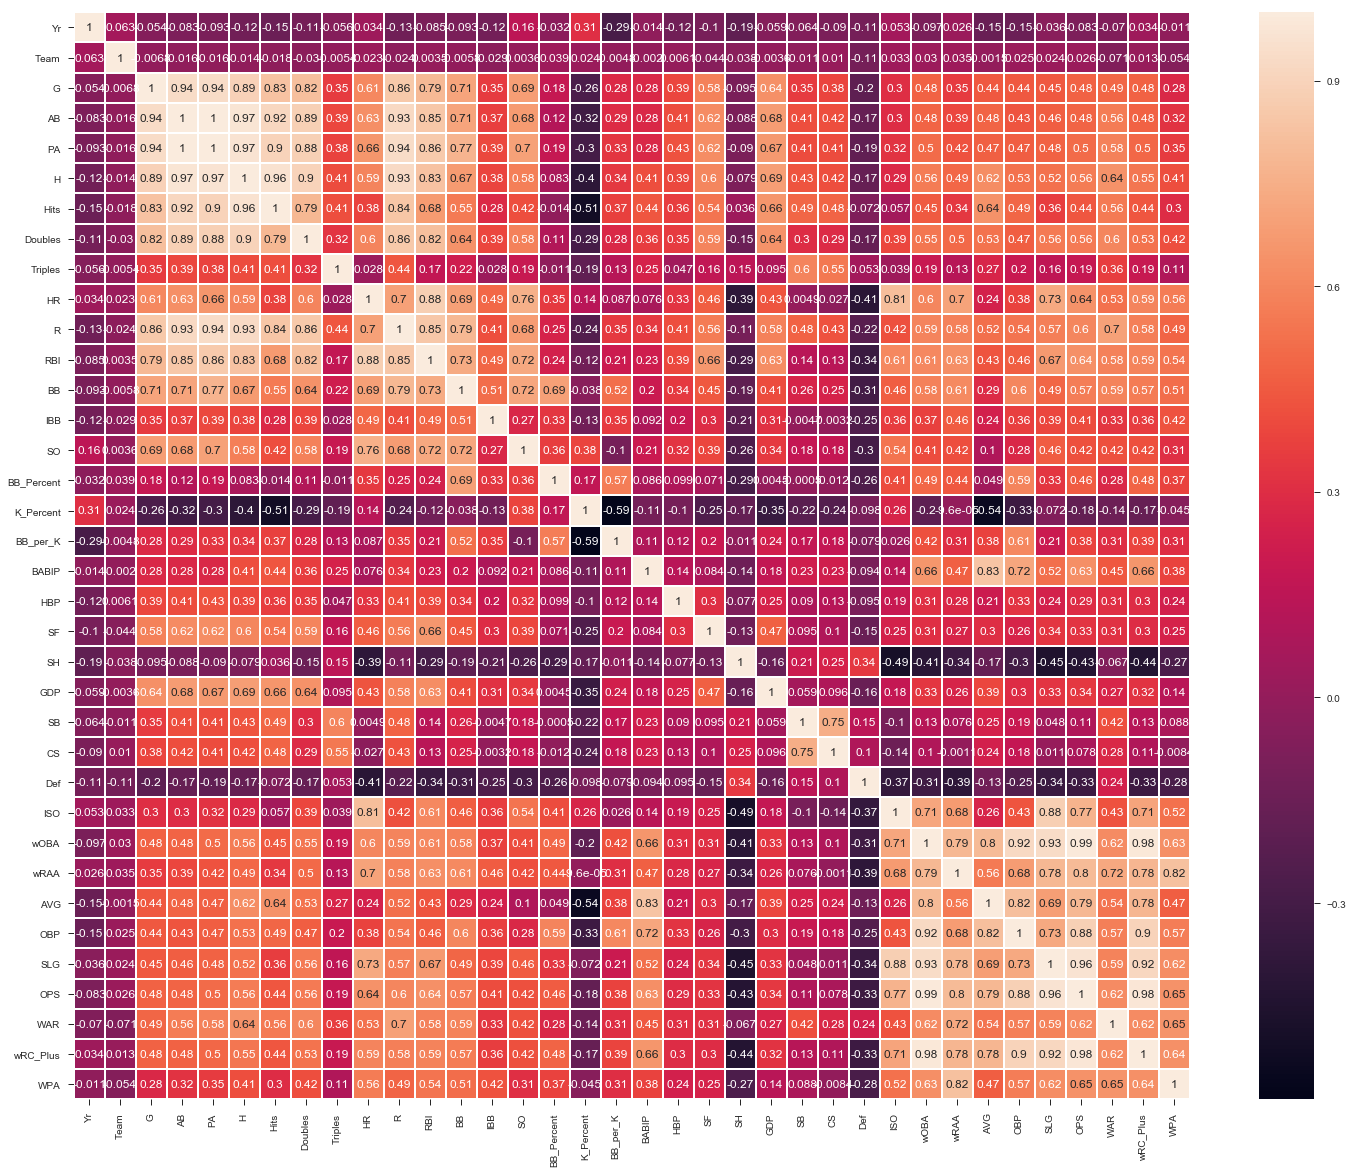

In [79]:
## Checking Correlation for Batters Independent Variables

plt.figure(figsize=(25, 20))
bat_df_corr = pd.DataFrame.corr(df_batX)
sns.heatmap(bat_df_corr, annot=True, linewidths=1)
plt.show()

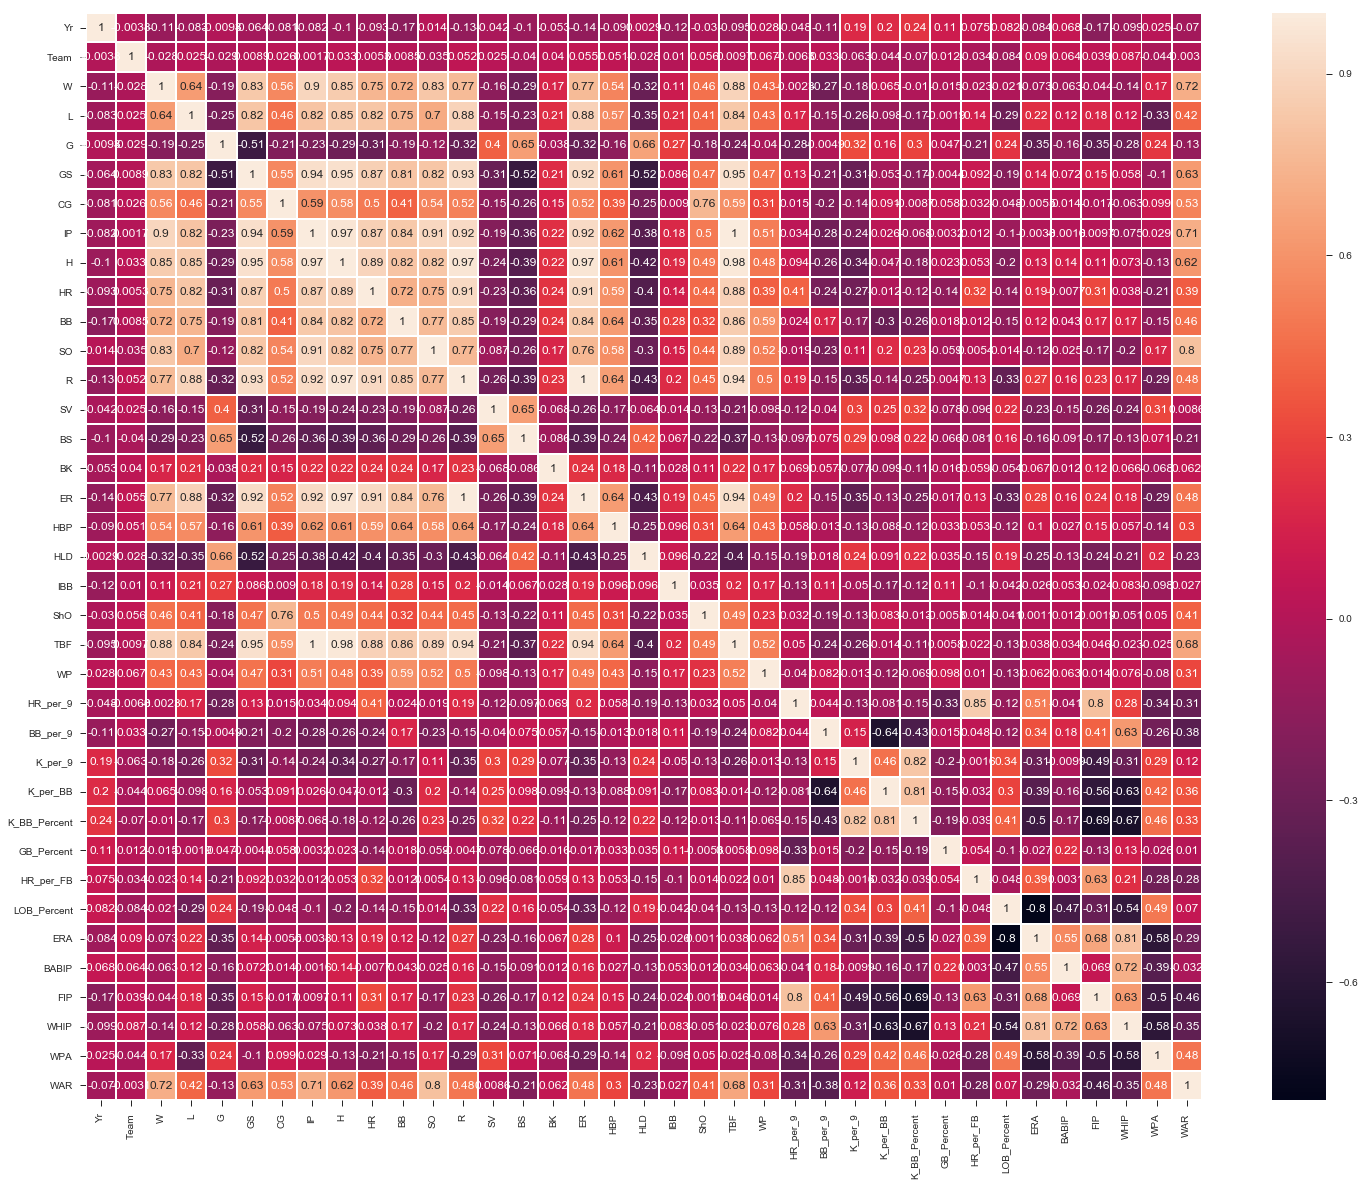

In [80]:
## Checking Correlation for Pitchers Independent Variables

plt.figure(figsize=(25, 20))
pit_df_corr = pd.DataFrame.corr(df_pitX)
sns.heatmap(pit_df_corr, annot=True, linewidths=1)
plt.show()

## * 1st  Batters info Modeling and P-VALUE check

In [81]:
bat_dfX = sm.add_constant(df_batX)
bat_dfY = pd.DataFrame(df_batY, columns=["Salary"])

In [82]:
model_bat = sm.OLS(df_batY, bat_dfX)
result_bat = model_bat.fit()
print(result_bat.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     25.05
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           1.24e-97
Time:                        04:38:32   Log-Likelihood:                -10862.
No. Observations:                 660   AIC:                         2.180e+04
Df Residuals:                     623   BIC:                         2.196e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.027e+07   6.57e+06      4.606      0.0

## * 1st  Pitchers info Modeling and P-VALUE check

In [83]:
pit_dfX = sm.add_constant(df_pitX)
pit_dfY = pd.DataFrame(df_pitY, columns=['Salary'])

In [84]:
model_pit = sm.OLS(pit_dfY, pit_dfX)
result_pit = model_pit.fit()
print(result_pit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     31.40
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          1.37e-111
Time:                        04:38:32   Log-Likelihood:                -9566.9
No. Observations:                 589   AIC:                         1.921e+04
Df Residuals:                     551   BIC:                         1.938e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.707e+06   6.03e+06     -0.946   

## * Scaling above Batters and Pitchers Data

In [85]:
b_cols_list = df_batX.columns.tolist()
p_cols_list = df_pitX.columns.tolist()

In [86]:
bat_cols_list = " + ".join(b_cols_list)
pit_cols_list = " + ".join(p_cols_list)

# * Batters

### * OLS analysis that uses 'from-formula' for Batters

In [87]:
salary_str = "Salary ~ "

In [88]:
ols_bat_list = salary_str + bat_cols_list
ols_pit_list = salary_str + pit_cols_list
ols_bat_list

'Salary ~ Yr + Team + G + AB + PA + H + Hits + Doubles + Triples + HR + R + RBI + BB + IBB + SO + BB_Percent + K_Percent + BB_per_K + BABIP + HBP + SF + SH + GDP + SB + CS + Def + ISO + wOBA + wRAA + AVG + OBP + SLG + OPS + WAR + wRC_Plus + WPA'

## * Filtrating 5% P-VALUE of OLS modeling for Batters

In [134]:
dfX_bat1 = dmatrix(bat_cols_list, df_batX)
dfX_bat1_columns = dfX_bat1.design_info.column_names
dfX_bat1 = pd.DataFrame(dfX_bat1, columns=dfX_bat1_columns)

In [135]:
bat_pvalues1 = extracted_pvals(result_bat, 0.05)

extracted_feature_b1 = bat_pvalues1.index.values
extracted_bat_x1 = dfX_bat1.loc[:, extracted_feature_b1]

### * 2nd OLS analysis for Batters

In [137]:
dfX_bat2 = sm.add_constant(extracted_bat_x1)

model_bat2 = sm.OLS(df_batY, dfX_bat2)
result_bat2 = model_bat2.fit()
print(result_bat2.summary())

LinAlgError: SVD did not converge

In [ ]:
dfX_bat2 = sm.add_constant(extracted_bat_x1)

model_bat2 = sm.OLS(df_batY, dfX_bat2)
result_bat2 = model_bat2.fit()
print(result_bat2.summary())

In [92]:
model_bat2 = sm.OLS.from_formula(ols_bat_list, data=bat_df)
result_bat2 = model_bat2.fit()
print(result_bat2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     25.05
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           1.24e-97
Time:                        04:38:35   Log-Likelihood:                -10862.
No. Observations:                 660   AIC:                         2.180e+04
Df Residuals:                     623   BIC:                         2.196e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.027e+07   6.57e+06      4.606      0.0

## * Filtrating 5% P-VALUE of from-formula OLS modeling for Batters

In [93]:
dfX_bat1 = dmatrix(bat_cols_list, df_batX)
dfX_bat1_columns = dfX_bat1.design_info.column_names
dfX_bat1 = pd.DataFrame(dfX_bat1, columns=dfX_bat1_columns)

In [94]:
bat_pvalues1 = extracted_pvals(result_bat2, 0.05)

extracted_feature_b1 = bat_pvalues1.index.values
extracted_bat_x1 = dfX_bat1.loc[:, extracted_feature_b1]

### * 2-2 OLS analysis for Batters

In [95]:
dfX_bat2 = sm.add_constant(extracted_bat_x1)

model_bat2 = sm.OLS(df_batY, dfX_bat2)
result_bat2 = model_bat2.fit()
print(result_bat2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     50.31
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           2.02e-84
Time:                        04:38:38   Log-Likelihood:                -10940.
No. Observations:                 660   AIC:                         2.191e+04
Df Residuals:                     647   BIC:                         2.196e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G           -2.39e+04   6566.842     -3.640      0.0

## * Deviding 3Types OLS modeling(1.Numeric Variables ONLY, 2.One Categorical Variable(Yr) + Numeric Variables + ZERO, and 3.The other Categorical Variable(Team) + Numeric Variables + ZERO) for 'BATTERS'

In [96]:
cols_b = df_batX.columns.tolist()

cat_cols_b = cols_b[:2]
num_cols_b = cols_b[2:]

cat_cols_list_b = []
num_cols_list_b = []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols_b:
        cat_cols_list_b.append("C(" + item1 + ")")
        
    for item2 in num_cols_b:
        num_cols_list_b.append("scale(" + item2 + ")")
        
    return cat_cols_list_b, num_cols_list_b

converted_cols_b = r_style_cat_cols(cat_cols_b, num_cols_b)

converted_cols_list_b = " + ".join(cat_cols_list_b + num_cols_list_b)
model_str_b = "Salary ~ "

zero = ' + 0'

ols_str_list_b = model_str_b + converted_cols_list_b + zero
merging_converted_cols_b = cat_cols_list_b + num_cols_list_b

## 1. Numeric Variables ONLY

### * 3rd OLS analysis

In [97]:
converted_num_ols_b = " + ".join(num_cols_list_b)

num_ols_model_b = model_str_b + converted_num_ols_b
num_ols_model_b

'Salary ~ scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA)'

In [98]:
model_bat3 = sm.OLS.from_formula(num_ols_model_b, data=bat_df)
result_bat3 = model_bat3.fit()
print(result_bat3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     26.08
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           1.67e-97
Time:                        04:38:40   Log-Likelihood:                -10866.
No. Observations:                 660   AIC:                         2.180e+04
Df Residuals:                     625   BIC:                         2.196e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.866e+06   1.37e+0

## * 1st Filtrating P-VALUE under 5% of 3rd OLS model for Batters

In [99]:
dfX_bat3 = dmatrix(converted_num_ols_b, df_batX)
dfX_bat3_columns = dfX_bat3.design_info.column_names
dfX_bat3 = pd.DataFrame(dfX_bat3, columns=dfX_bat3_columns)

In [100]:
bat_pvalues3 = extracted_pvals(result_bat3, 0.05)

extracted_feature_b3 = list(bat_pvalues3.index.values)
extracted_bat_x3 = dfX_bat3.loc[:, extracted_feature_b3]

### * 4th OLS analysis for Batters

In [101]:
dfX_bat4 = sm.add_constant(extracted_bat_x3)
model_bat4 = sm.OLS(df_batY, dfX_bat4)
result_bat4 = model_bat4.fit()
print(result_bat4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     66.00
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           4.18e-92
Time:                        04:38:41   Log-Likelihood:                -10926.
No. Observations:                 660   AIC:                         2.187e+04
Df Residuals:                     649   BIC:                         2.192e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.866e+06   1.47e+05  

## * Filtrating P-VALUE under 5% of 4th OLS model for Batters

In [102]:
bat_pvalues4 = extracted_pvals(result_bat4, 0.05)

extracted_feature_b4 = list(bat_pvalues4.index.values)
extracted_bat_x4 = dfX_bat4.loc[:, extracted_feature_b4]

In [103]:
dfX_bat4_1 = sm.add_constant(extracted_bat_x4)
model_bat4_1 = sm.OLS(bat_dfY, dfX_bat4_1)
result_bat4_1 = model_bat4_1.fit()
print(result_bat4_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     82.69
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           5.71e-94
Time:                        04:38:41   Log-Likelihood:                -10926.
No. Observations:                 660   AIC:                         2.187e+04
Df Residuals:                     651   BIC:                         2.191e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.866e+06   1.47e+05     33.172   

## 2. Categorical Variable(Yr) + Numeric Variables + ZERO

In [104]:
yr_str_b = 'C(Yr) + '

cat_num_ols_list_b = model_str + yr_str_b + converted_num_ols_b + zero
cat_num_ols_list_b

'Salary ~ C(Yr) + scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + 0'

### * 5th OLS analysis for Batters

In [105]:
model_bat5 = sm.OLS.from_formula(cat_num_ols_list_b, bat_df)
result_bat5 = model_bat5.fit()
print(result_bat5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     21.74
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           6.99e-99
Time:                        04:38:42   Log-Likelihood:                -10843.
No. Observations:                 660   AIC:                         2.178e+04
Df Residuals:                     614   BIC:                         2.198e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(Yr)[0]           4.659e+06   5.48e+0

## * 1st Filtrating P-VALUE under 5% of 5th OLS model for Batters

In [106]:
filtration_str_list_b = yr_str + converted_num_ols_b + zero

dfX_bat5 = dmatrix(filtration_str_list_b, df_batX)
dfX_bat5_columns = dfX_bat5.design_info.column_names
dfX_bat5 = pd.DataFrame(dfX_bat5, columns=dfX_bat5_columns)

In [107]:
bat_pvalues5 = extracted_pvals(result_bat5, 0.05)

extracted_feature_b5 = list(bat_pvalues5.index.values)
extracted_bat_x5 = dfX_bat5.loc[:, extracted_feature_b5]

### * 6th OLS analysis for Batters

In [108]:
dfX_bat6 = sm.add_constant(extracted_bat_x5)
model_bat6 = sm.OLS(df_batY, dfX_bat6)
result_bat6 = model_bat6.fit()
print(result_bat6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     36.46
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           1.16e-94
Time:                        04:38:43   Log-Likelihood:                -10897.
No. Observations:                 660   AIC:                         2.184e+04
Df Residuals:                     638   BIC:                         2.194e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.606e+06   1.32e+05  

## * Filtrating P-VALUE under 5% of 6th OLS model for Batters

In [109]:
bat_pvalues6 = extracted_pvals(result_bat6, 0.05)

extracted_feature_b6 = list(bat_pvalues6.index.values)
extracted_bat_x6 = dfX_bat6.loc[:, extracted_feature_b6]

### * 7th OLS analysis for Batters

In [110]:
dfX_bat7 = sm.add_constant(extracted_bat_x6)
model_bat7 = sm.OLS(df_batY, dfX_bat7)
result_bat7 = model_bat7.fit()
print(result_bat7.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     58.54
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          5.11e-100
Time:                        04:38:44   Log-Likelihood:                -10900.
No. Observations:                 660   AIC:                         2.183e+04
Df Residuals:                     646   BIC:                         2.189e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.765e+06   1.86e+05  

## * Filtrating P-VALUE under 5% of 7th OLS model for Batters

In [111]:
bat_pvalues7 = extracted_pvals(result_bat7, 0.05)
extracted_feature_b7 = list(bat_pvalues7.index.values)
extracted_bat_x7 = dfX_bat7.loc[:, extracted_feature_b7]

### * 8th OLS analysis for Batters

In [112]:
dfX_bat8 = sm.add_constant(extracted_bat_x7)
model_bat8 = sm.OLS(bat_dfY, dfX_bat8)
result_bat8 = model_bat8.fit()
print(result_bat8.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     63.00
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          2.59e-100
Time:                        04:38:45   Log-Likelihood:                -10902.
No. Observations:                 660   AIC:                         2.183e+04
Df Residuals:                     647   BIC:                         2.189e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.869e+06   1.76e+05  

## 3. Categorical Variable(Team) + Numeric Variables + ZERO

In [113]:
team_str_b = 'C(Team) + '

cat_num_ols_list2_b = model_str + team_str_b + converted_num_ols_b + zero
cat_num_ols_list2_b

'Salary ~ C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + 0'

### * 9th OLS analysis for Batters

In [114]:
model_bat9 = sm.OLS.from_formula(cat_num_ols_list2_b, bat_df)
result_bat9 = model_bat9.fit()
print(result_bat9.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     14.46
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           8.60e-86
Time:                        04:38:46   Log-Likelihood:                -10844.
No. Observations:                 660   AIC:                         2.182e+04
Df Residuals:                     594   BIC:                         2.212e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(Team)[0]         5.226e+06   1.35e+0

## * 1st Filtrating P-VALUE under 5% of 9th OLS model

In [115]:
filtration_str_list2_b = team_str_b + converted_num_ols_b + zero

dfX_bat9 = dmatrix(filtration_str_list2_b, data=bat_df)
dfX_bat9_columns = dfX_bat9.design_info.column_names
dfX_bat9 = pd.DataFrame(dfX_bat9, columns=dfX_bat9_columns)

In [116]:
bat_pvalues9 = extracted_pvals(result_bat9, 0.01)

extracted_features9 = list(bat_pvalues9.index.values)
extracted_bat_x9 = dfX_bat9.loc[:, extracted_features9]

### * 10th OLS analysis for Batters

In [117]:
dfX_bat10 = sm.add_constant(extracted_bat_x9)
model_bat10 = sm.OLS(bat_dfY, dfX_bat10)
result_bat10 = model_bat10.fit()
print(result_bat10.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     8.011
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           1.68e-34
Time:                        04:38:47   Log-Likelihood:                -11023.
No. Observations:                 660   AIC:                         2.213e+04
Df Residuals:                     620   BIC:                         2.230e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.334e+06   2.01e+06  

## * Filtrating P-VALUE under 5% of 10th OLS model

In [118]:
bat_pvalues10 = extracted_pvals(result_bat10, 0.01)
extracted_feature_b10 = list(bat_pvalues10.index.values)
extracted_bat_x10 = dfX_bat10.loc[:, extracted_feature_b10]

### * 11th OLS analysis for Batters

In [119]:
dfX_bat11 = sm.add_constant(extracted_bat_x10)
model_bat11 = sm.OLS(bat_dfY, dfX_bat11)
result_bat11 = model_bat11.fit()
print(result_bat11.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     36.61
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           2.93e-43
Time:                        04:38:48   Log-Likelihood:                -11048.
No. Observations:                 660   AIC:                         2.211e+04
Df Residuals:                     652   BIC:                         2.215e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.866e+06   1.76e+05  

**
※ In total(1.Numeric variables ONLY, 2.One categorical variable(Yr) + Numeric variables + ZERO, and 3.The other categorical variable(Team) and Numeric variables + ZERO), 8th OLS analysis(filtrating 5% P-VALUE about OLS modeling of the Categorical variable(Yr) and all numeric variables) showed the best results for the total number of remaining variables and the performance of the variables. **

** But Overall, the 'R-squared' SCORE of newly tried Models for BATTERS is too low.**

=======================================================================================

# * Pitchers

### * OLS analysis that uses 'from-formula' for Batters

In [120]:
ols_pit_list = salary_str + pit_cols_list
ols_pit_list = salary_str + pit_cols_list
ols_pit_list

'Salary ~ Yr + Team + W + L + G + GS + CG + IP + H + HR + BB + SO + R + SV + BS + BK + ER + HBP + HLD + IBB + ShO + TBF + WP + HR_per_9 + BB_per_9 + K_per_9 + K_per_BB + K_BB_Percent + GB_Percent + HR_per_FB + LOB_Percent + ERA + BABIP + FIP + WHIP + WPA + WAR'

## * Filtrating 5% P-VALUE of OLS modeling for Pitchers

In [131]:
dfX_pit1 = dmatrix(pit_cols_list, df_pitX)
dfX_pit1_columns = dfX_pit1.design_info.column_names
dfX_pit1 = pd.DataFrame(dfX_pit1, columns=dfX_pit1_columns)

In [132]:
pit_pvalues1 = extracted_pvals(result_pit, 0.05)

extracted_feature_p1 = pit_pvalues1.index.values
extracted_pit_x1 = dfX_pit1.loc[:, extracted_feature_p1]

### * 2nd OLS analysis for Pitchers

In [133]:
dfX_pit2 = sm.add_constant(extracted_pit_x1)

model_pit2 = sm.OLS(pit_dfY, dfX_pit2)
result_pit2 = model_pit2.fit()
print(result_pit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     141.2
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          5.96e-121
Time:                        05:09:23   Log-Likelihood:                -9608.3
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     581   BIC:                         1.927e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.022e+06   2.79e+05      3.664      0.0

In [138]:
cols_p = df_pitX.columns.tolist()

cat_cols_p = cols_p[:2]
num_cols_p = cols_p[2:70]

cat_cols_list_p = []
num_cols_list_p = []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols_p:
        cat_cols_list_p.append("C(" + item1 + ")")
        
    for item2 in num_cols_p:
        num_cols_list_p.append("scale(" + item2 + ")")
        
    return cat_cols_list_p, num_cols_list_p

converted_cols_p = r_style_cat_cols(cat_cols_p, num_cols_p)

converted_cols_list_p = " + ".join(cat_cols_list_p + num_cols_list_p)
model_str_p = "Salary ~ "

zero = ' + 0'

ols_str_list_p = model_str_p + converted_cols_list_p + zero
merging_converted_cols_p = cat_cols_list_p + num_cols_list_p

## 1. Numeric Variables ONLY

### * 3rd OLS analysis for Pitchers

In [139]:
converted_num_ols_p = " + ".join(num_cols_list_p)

num_ols_model_p = model_str_p + converted_num_ols_p
num_ols_model_p

'Salary ~ scale(W) + scale(L) + scale(G) + scale(GS) + scale(CG) + scale(IP) + scale(H) + scale(HR) + scale(BB) + scale(SO) + scale(R) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP) + scale(HLD) + scale(IBB) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP) + scale(FIP) + scale(WHIP) + scale(WPA) + scale(WAR)'

In [140]:
model_pit3 = sm.OLS.from_formula(num_ols_model_p, data=pit_df)
result_pit3 = model_pit3.fit()
print(result_pit3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     32.77
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          8.08e-112
Time:                        05:36:53   Log-Likelihood:                -9570.2
No. Observations:                 589   AIC:                         1.921e+04
Df Residuals:                     553   BIC:                         1.937e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.912e+06   1

## * 1st Filtrating P-VALUE under 5% of 3rd OLS model for Pitchers

In [141]:
dfX_pit3 = dmatrix(converted_num_ols_p, df_pitX)
dfX_pit3_columns = dfX_pit3.design_info.column_names
dfX_pit3 = pd.DataFrame(dfX_pit3, columns=dfX_pit3_columns)

In [142]:
pit_pvalues3 = extracted_pvals(result_pit3, 0.05)

extracted_feature_p3 = list(pit_pvalues3.index.values)
extracted_pit_x3 = dfX_pit3.loc[:, extracted_feature_p3]

### * 4th OLS analysis for Pitchers

In [143]:
dfX_pit4 = sm.add_constant(extracted_pit_x3)
model_pit4 = sm.OLS(df_pitY, dfX_pit4)
result_pit4 = model_pit4.fit()
print(result_pit4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     123.9
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          3.31e-120
Time:                        05:37:53   Log-Likelihood:                -9607.5
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     580   BIC:                         1.927e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.912e+06   1

## 2. Categorical Variable(Yr) + Numeric Variables + ZERO

In [144]:
yr_str_p = 'C(Yr) + '

cat_num_ols_list_p = model_str + yr_str_p + converted_num_ols_p + zero
cat_num_ols_list_p

'Salary ~ C(Yr) + scale(W) + scale(L) + scale(G) + scale(GS) + scale(CG) + scale(IP) + scale(H) + scale(HR) + scale(BB) + scale(SO) + scale(R) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP) + scale(HLD) + scale(IBB) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP) + scale(FIP) + scale(WHIP) + scale(WPA) + scale(WAR) + 0'

### * 5th OLS analysis for Pitchers

In [145]:
model_pit5 = sm.OLS.from_formula(cat_num_ols_list_p, pit_df)
result_pit5 = model_pit5.fit()
print(result_pit5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     26.57
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          2.97e-110
Time:                        05:39:12   Log-Likelihood:                -9553.4
No. Observations:                 589   AIC:                         1.920e+04
Df Residuals:                     542   BIC:                         1.941e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Yr)[0]             5.642e+06   4

## * 1st Filtrating P-VALUE under 5% of 5th OLS model for Pitchers

In [146]:
filtration_str_list_p = yr_str + converted_num_ols_p + zero

dfX_pit5 = dmatrix(filtration_str_list_p, df_pitX)
dfX_pit5_columns = dfX_pit5.design_info.column_names
dfX_pit5 = pd.DataFrame(dfX_pit5, columns=dfX_pit5_columns)

In [147]:
pit_pvalues5 = extracted_pvals(result_pit5, 0.05)

extracted_feature_p5 = list(pit_pvalues5.index.values)
extracted_pit_x5 = dfX_pit5.loc[:, extracted_feature_p5]

### * 6th OLS analysis for Pitchers

In [148]:
dfX_pit6 = sm.add_constant(extracted_pit_x5)
model_pit6 = sm.OLS(df_pitY, dfX_pit6)
result_pit6 = model_pit6.fit()
print(result_pit6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     56.01
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          3.09e-113
Time:                        05:40:09   Log-Likelihood:                -9601.1
No. Observations:                 589   AIC:                         1.924e+04
Df Residuals:                     570   BIC:                         1.932e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.519e+06   1.16e+05     38.935      0.0

## * Filtrating P-VALUE under 5% of 6th OLS model for Pitchers

In [149]:
pit_pvalues6 = extracted_pvals(result_pit6, 0.05)

extracted_feature_p6 = list(pit_pvalues6.index.values)
extracted_pit_x6 = dfX_pit6.loc[:, extracted_feature_p6]

### * 7th OLS analysis for Pitchers

In [150]:
dfX_pit7 = sm.add_constant(extracted_pit_x6)
model_pit7 = sm.OLS(df_pitY, dfX_pit7)
result_pit7 = model_pit7.fit()
print(result_pit7.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     91.67
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          7.14e-119
Time:                        05:40:59   Log-Likelihood:                -9603.3
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     577   BIC:                         1.928e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.515e+06    1.5e+05     30.019      0.0

## * Filtrating P-VALUE under 5% of 7th OLS model for Pitchers

In [152]:
pit_pvalues7_1 = extracted_pvals(result_pit7, 0.05)

extracted_feature_p7_1 = list(pit_pvalues7_1.index.values)
extracted_pit_x7_1 = dfX_pit7.loc[:, extracted_feature_p7_1]

### * 7-1 OLS analysis for Pitchers

In [153]:
dfX_pit7_1 = sm.add_constant(extracted_pit_x7_1)
model_pit7_1 = sm.OLS(df_pitY, dfX_pit7_1)
result_pit7_1 = model_pit7_1.fit()
print(result_pit7_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     100.1
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          3.87e-119
Time:                        05:43:45   Log-Likelihood:                -9605.1
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     578   BIC:                         1.928e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.614e+06   1.41e+05     32.684      0.0

## 3. Categorical Variable(Team) + Numeric Variables + ZERO

In [154]:
team_str_p = 'C(Team) + '

cat_num_ols_list2_p = model_str + team_str_p + converted_num_ols_p + zero
cat_num_ols_list2_p

'Salary ~ C(Team) + scale(W) + scale(L) + scale(G) + scale(GS) + scale(CG) + scale(IP) + scale(H) + scale(HR) + scale(BB) + scale(SO) + scale(R) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP) + scale(HLD) + scale(IBB) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP) + scale(FIP) + scale(WHIP) + scale(WPA) + scale(WAR) + 0'

### * 8th OLS analysis for Pitchers

In [155]:
model_pit8 = sm.OLS.from_formula(cat_num_ols_list2_p, pit_df)
result_pit8 = model_pit8.fit()
print(result_pit8.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     18.22
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           8.73e-98
Time:                        05:46:07   Log-Likelihood:                -9552.5
No. Observations:                 589   AIC:                         1.924e+04
Df Residuals:                     523   BIC:                         1.953e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Team)[0]           5.706e+06   6

## * 1st Filtrating P-VALUE under 5% of 8th OLS model

In [156]:
filtration_str_list2_p = team_str_p + converted_num_ols_p + zero

dfX_pit8 = dmatrix(filtration_str_list2_p, data=pit_df)
dfX_pit8_columns = dfX_pit8.design_info.column_names
dfX_pit8 = pd.DataFrame(dfX_pit8, columns=dfX_pit8_columns)

In [157]:
pit_pvalues8 = extracted_pvals(result_pit8, 0.05)

extracted_features8 = list(pit_pvalues8.index.values)
extracted_pit_x8 = dfX_pit8.loc[:, extracted_features8]

### * 9th OLS analysis for Pitchers

In [158]:
dfX_pit9 = sm.add_constant(extracted_pit_x8)
model_pit9 = sm.OLS(pit_dfY, dfX_pit9)
result_pit9 = model_pit9.fit()
print(result_pit9.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     28.86
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          1.75e-106
Time:                        05:47:14   Log-Likelihood:                -9578.0
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     550   BIC:                         1.940e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.775e+06   1.34e+05     35.763      

## * Filtrating P-VALUE under 5% of 9th OLS model

In [159]:
pit_pvalues9 = extracted_pvals(result_pit9, 0.01)
extracted_feature_p9 = list(pit_pvalues9.index.values)
extracted_pit_x9 = dfX_pit9.loc[:, extracted_feature_p9]

### * 10th OLS analysis for Pitchers

In [160]:
dfX_pit10 = sm.add_constant(extracted_pit_x9)
model_pit10 = sm.OLS(pit_dfY, dfX_pit10)
result_pit10 = model_pit10.fit()
print(result_pit10.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     131.9
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          3.15e-125
Time:                        05:47:53   Log-Likelihood:                -9595.7
No. Observations:                 589   AIC:                         1.921e+04
Df Residuals:                     580   BIC:                         1.925e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.837e+06   1.23e+05     39.383      

In [161]:
print(dfX10.columns.tolist())

['const', 'scale(WAR)', 'scale(GDP)', 'scale(SO_p)', 'scale(IBB_b)', 'scale(SB)', 'scale(SV)', 'scale(ER)', 'C(Yr)[10]', 'C(Yr)[9]', 'scale(wRAA)', 'C(Yr)[8]', 'scale(W)', 'C(Yr)[3]', 'scale(G)', 'scale(BABIP_b)', 'scale(IBB_p)', 'C(Yr)[7]', 'scale(SLG)', 'scale(OBP)', 'scale(OPS)', 'scale(BK)', 'scale(HR_p)', 'scale(K_Percent)']


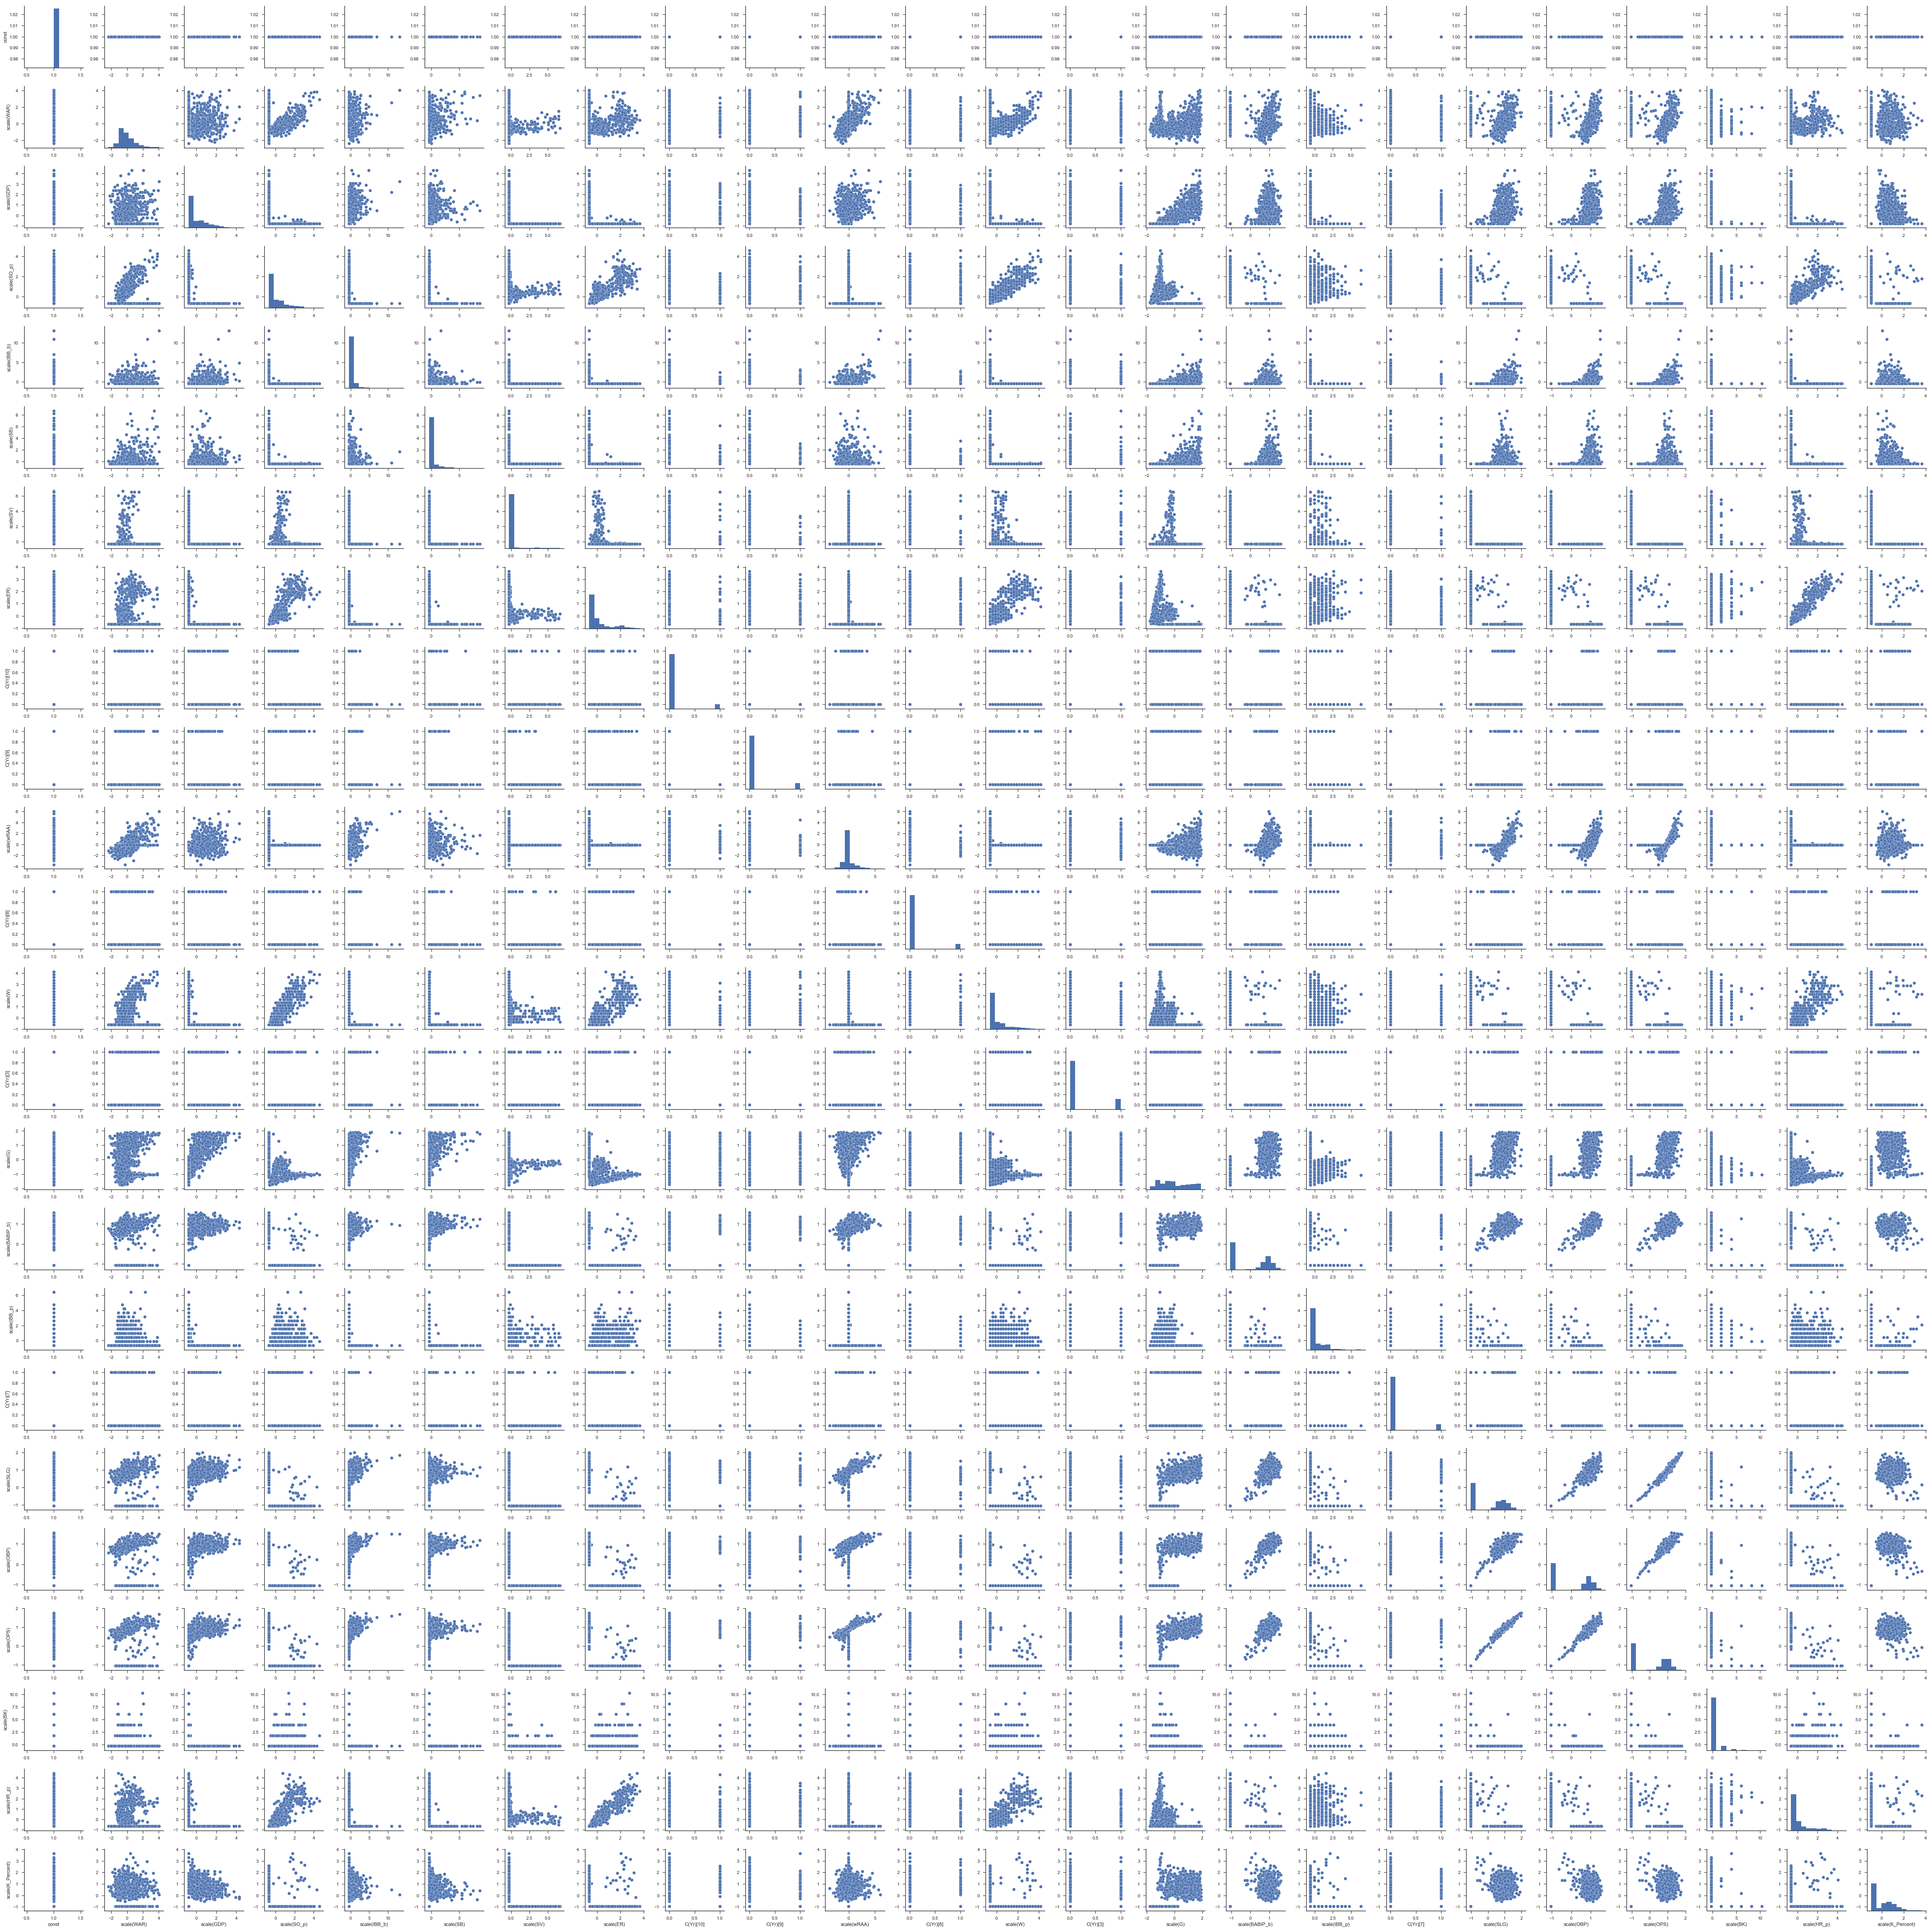

In [162]:
cols = ['const', 'scale(WAR)', 'scale(GDP)', 'scale(SO_p)', 'scale(IBB_b)', 'scale(SB)', 'scale(SV)', 'scale(ER)',
        'C(Yr)[10]', 'C(Yr)[9]', 'scale(wRAA)', 'C(Yr)[8]', 'scale(W)', 'C(Yr)[3]', 'scale(G)', 'scale(BABIP_b)',
        'scale(IBB_p)', 'C(Yr)[7]', 'scale(SLG)', 'scale(OBP)', 'scale(OPS)', 'scale(BK)', 'scale(HR_p)', 'scale(K_Percent)']
sns.pairplot(extracted_df_x9[cols])
plt.show()

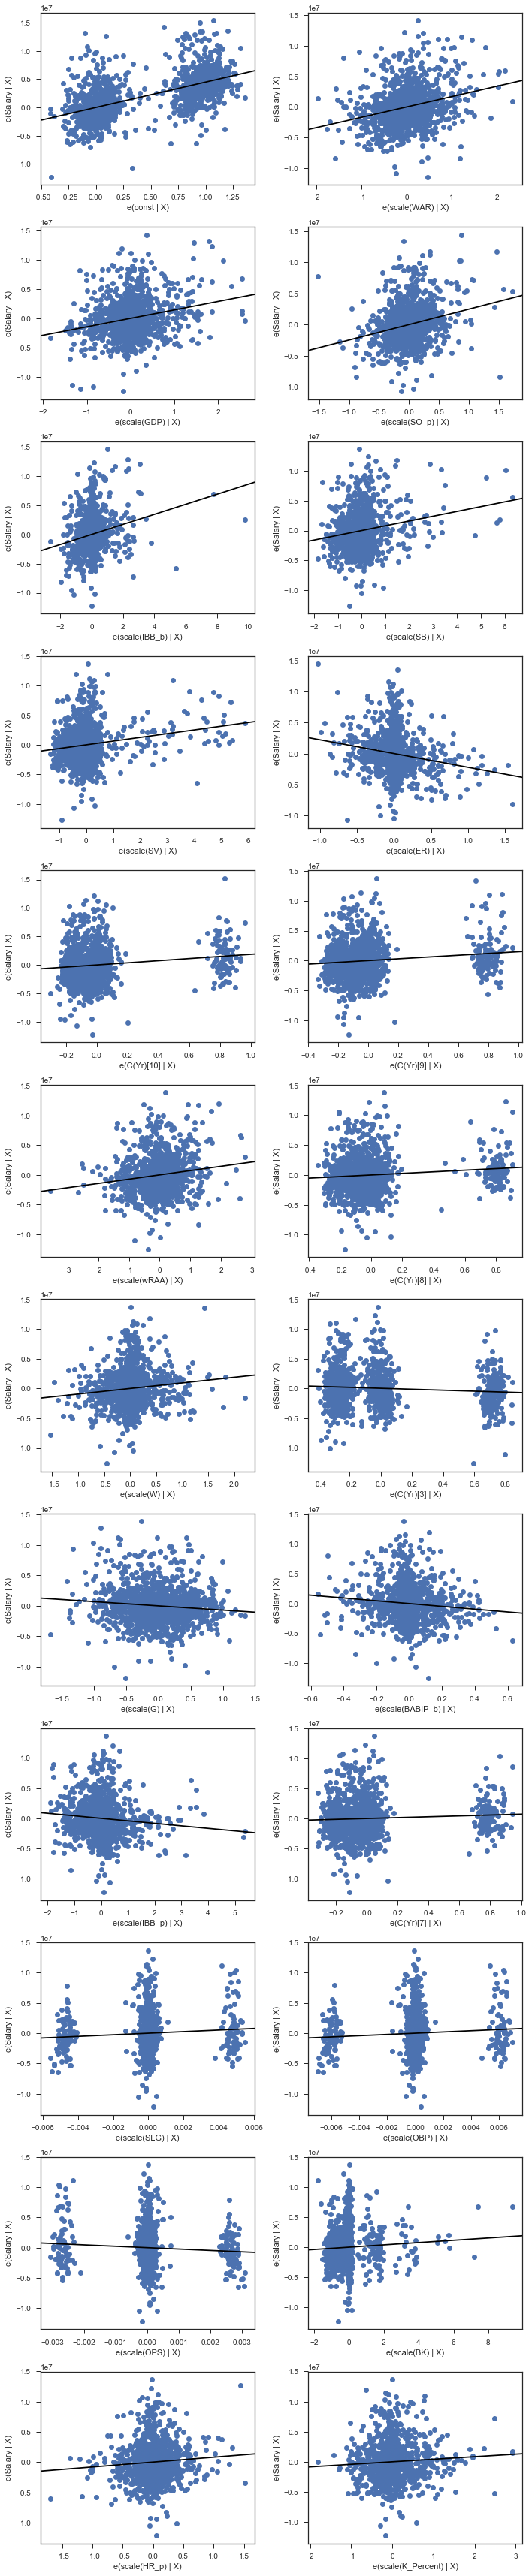

In [170]:
fig = plt.figure(figsize=(10,50))
sm.graphics.plot_partregress_grid(result10, fig=fig)
fig.suptitle("")
plt.show()

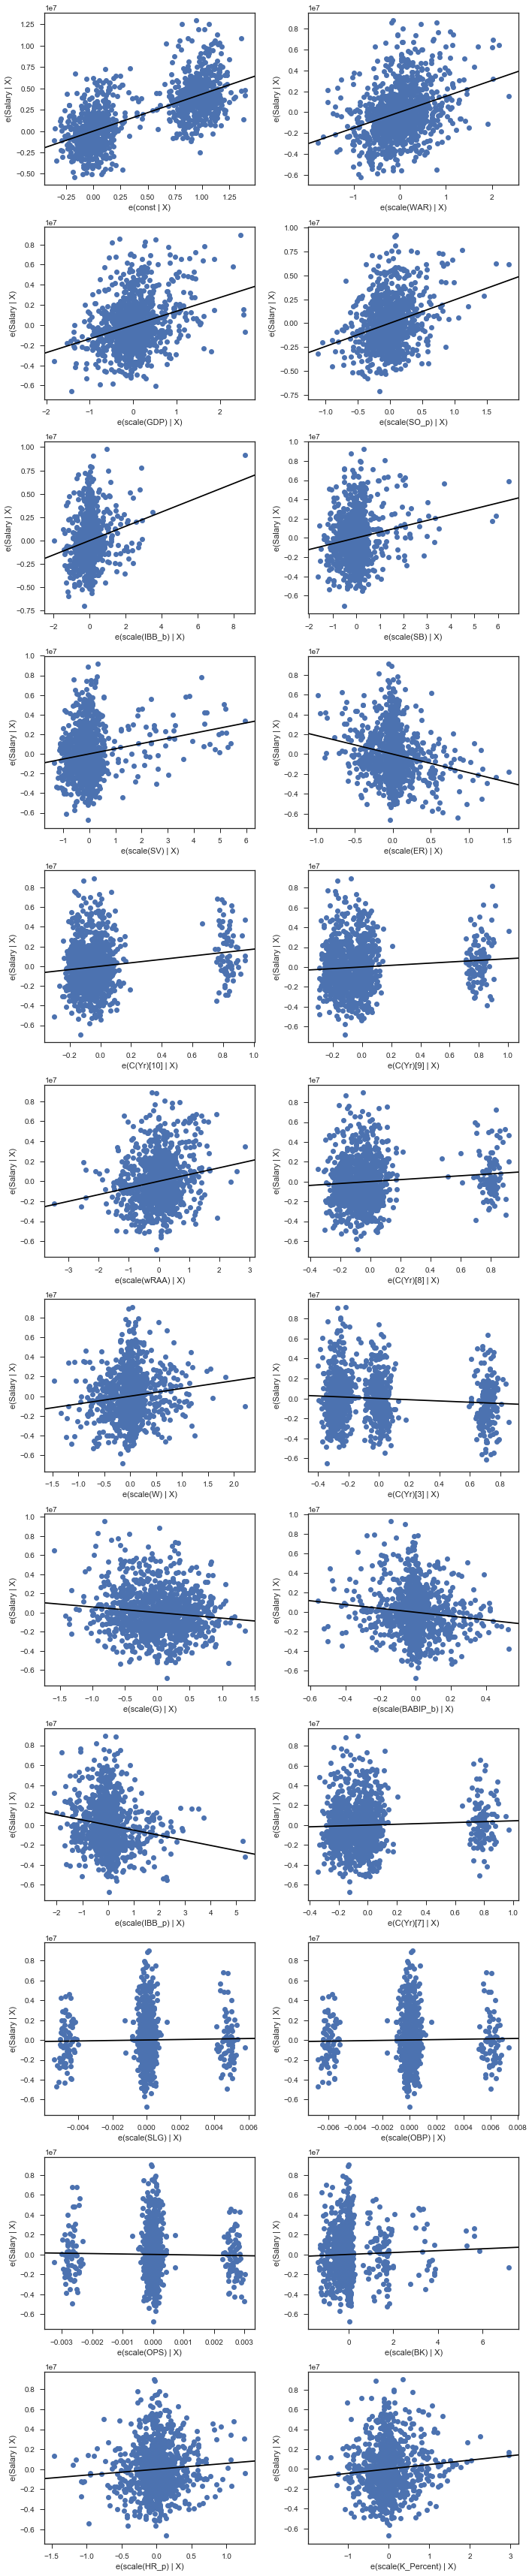

In [172]:
fig = plt.figure(figsize=(10,50))
sm.graphics.plot_partregress_grid(result10_idx_elimVer, fig=fig)
fig.suptitle("")
plt.show()

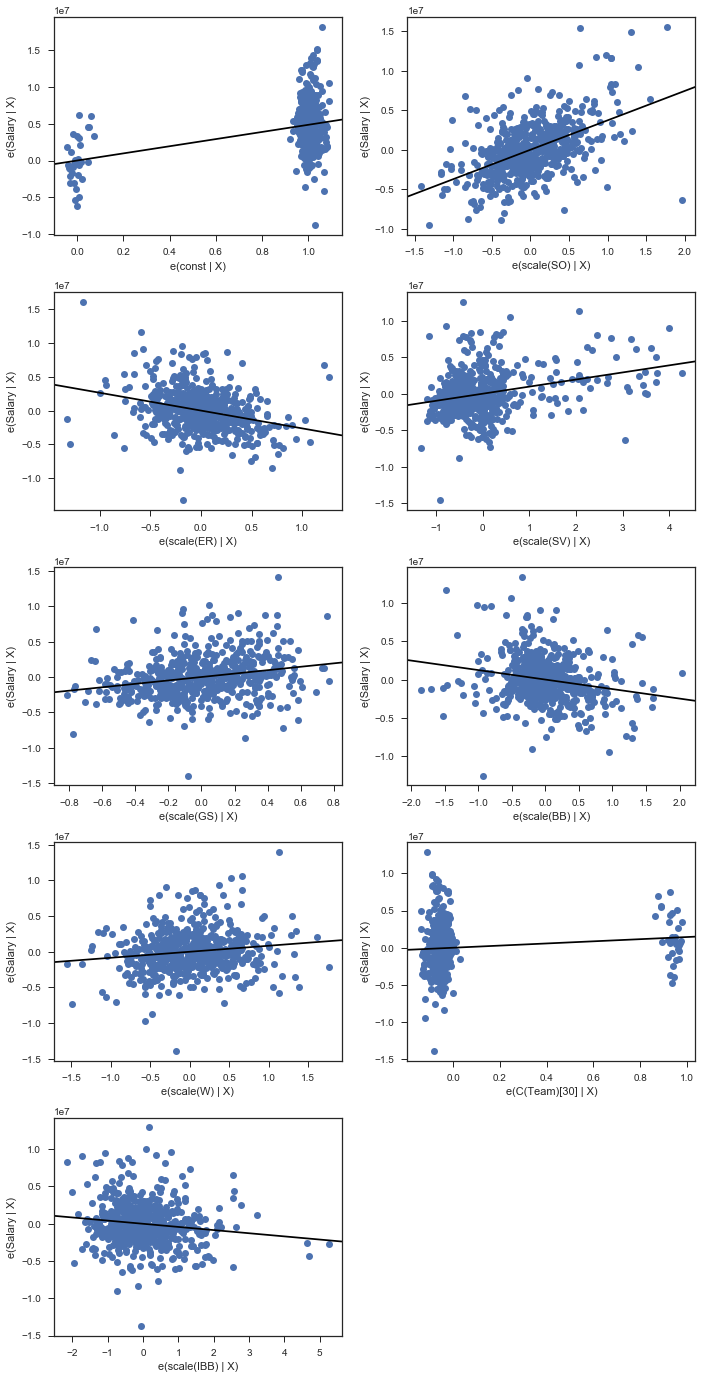

In [168]:
fig = plt.figure(figsize=(10,20))
sm.graphics.plot_partregress_grid(result_pit10, fig=fig)
fig.suptitle("")
plt.show()

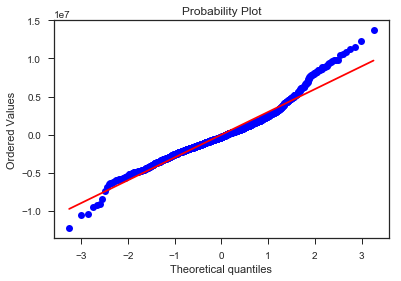

In [174]:
sp.stats.probplot(result10.resid, plot=plt)
plt.show()

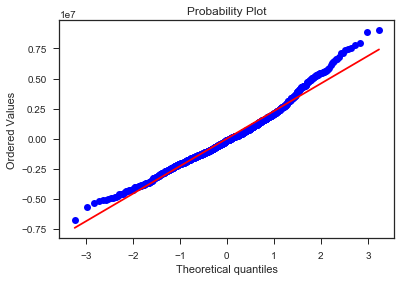

In [173]:
sp.stats.probplot(result10_idx_elimVer.resid, plot=plt)
plt.show()

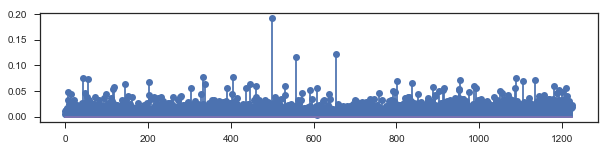

In [175]:
influence = result10.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

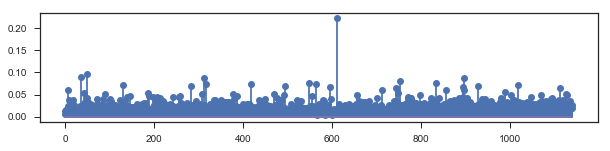

In [176]:
influence = result10_idx_elimVer.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

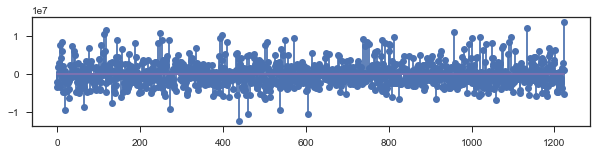

In [177]:
plt.figure(figsize=(10, 2))
plt.stem(result10.resid)
plt.show()

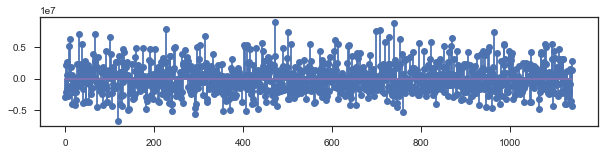

In [178]:
plt.figure(figsize=(10, 2))
plt.stem(result10_idx_elimVer.resid)
plt.show()

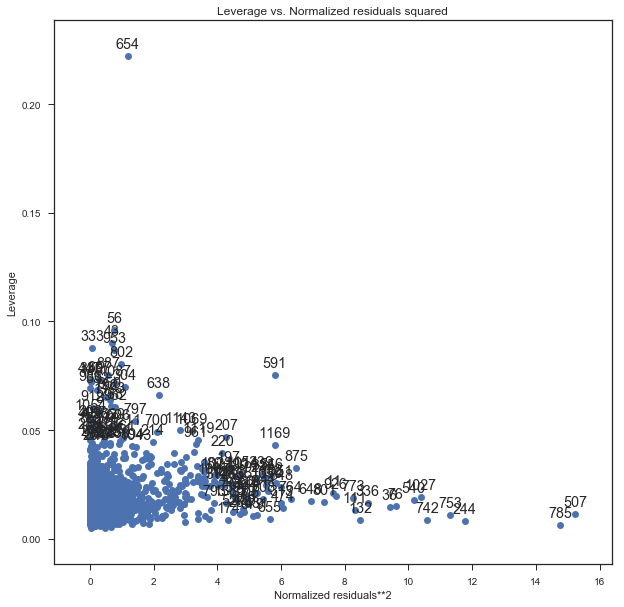

In [179]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(10,10))
fig = plot_leverage_resid2(result10_idx_elimVer, ax = ax)

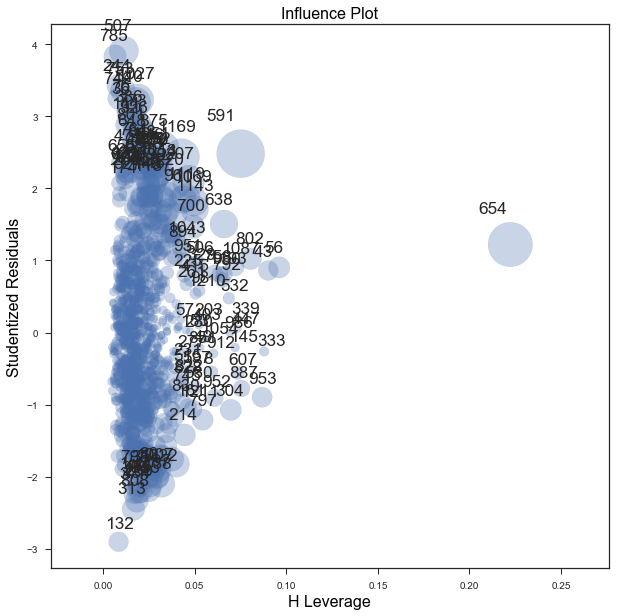

In [180]:
fig, ax = plt.subplots(figsize=(10,10))
sm.graphics.influence_plot(result10_idx_elimVer, plot_alpha=0.3, ax = ax)
plt.show()

# * Checking SCORE and RMSE  for the selected model(10th, not deviding data)

In [181]:
X = dfX10.values
y = dfY.values

In [182]:
## Why include shuffle of Signature?
## A: Because the data is aligned by year, the shuffle is set 'True' to eliminate sequential alignment.

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, shuffle=True, random_state=0)

In [183]:
X_test.shape

(245, 24)

In [184]:
y_test.shape

(245, 1)

## * Regression analysis using "Linear Regression" model

In [185]:
modelLR = LinearRegression(fit_intercept=True).fit(X_train, y_train)

In [186]:
print(np.sqrt(mean_squared_error(y_train, modelLR.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test, modelLR.predict(X_test))))

3051578.65545
3053629.56788


In [193]:
## Checking difference y_test from y_train

print(np.sqrt(mean_squared_error(y_test, modelLR.predict(X_test))) - np.sqrt(mean_squared_error(y_train, modelLR.predict(X_train))))

2050.91243181


In [187]:
modelLR.score(X_test, y_test)

0.59270458218407962

## * Regression analysis using "XGBoost" model 1

In [246]:
df_xgb = XGBRegressor(subsample=0.75)

In [247]:
df_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.75)

In [248]:
xgb_pred = df_xgb.predict(X_test)
print(explained_variance_score(xgb_pred, y_test), '\n')
print(np.sqrt(mean_squared_error(y_train, df_xgb.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test, xgb_pred)))

0.610774529406 

2149067.02769
2975323.68699


In [249]:
## Checking difference y_test from y_train

print(np.sqrt(mean_squared_error(y_test, xgb_pred)) - np.sqrt(mean_squared_error(y_train, df_xgb.predict(X_train))))

826256.659298


In [250]:
df_xgb.predict(X_test)
df_xgb.score(X_test, y_test)

0.61332574332057388

## * Regression analysis using "XGBoost" model 2 (Default)

In [194]:
xgb_model = XGBRegressor()

In [195]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [196]:
y_pred_xgb1_test = xgb_model.predict(X_test)
print(explained_variance_score(y_pred_xgb1_test, y_test), '\n')
print(np.sqrt(mean_squared_error(y_train, xgb_model.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test, y_pred_xgb1_test)))

0.576379078474 

2217190.73604
3013812.99658


In [252]:
## Checking difference y_test from y_train

print(np.sqrt(mean_squared_error(y_test, y_pred_xgb1_test)) - np.sqrt(mean_squared_error(y_train, xgb_model.predict(X_train))))

796622.260545


In [254]:
xgb_model.predict(X_test)
xgb_model.score(X_test, y_test)

0.60325686331077866

## * Regression analysis using "SVR" model

In [255]:
svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [256]:
y_pred_svm = svm_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, svm_model.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test, y_pred_svm)))

5389230.85699
5101236.17634


In [257]:
svm_model.predict(X_test)
svm_model.score(X_test, y_test)

-0.1366524219019114

## * Regression analysis using the "LassoLarsCV" model

In [258]:
modelLL = LassoLarsCV(cv=10, precompute=False).fit(X_train, y_train)

In [259]:
train_error = np.sqrt(mean_squared_error(y_train, modelLL.predict(X_train)))
test_error = np.sqrt(mean_squared_error(y_test, modelLL.predict(X_test)))

In [260]:
print ('training data RMSE: ', train_error)
print ('test data RMSE: ', test_error)

training data RMSE:  3051578.65545
test data RMSE:  3053629.56793


In [261]:
print(test_error - train_error)

2050.91247833


In [262]:
modelLL_pred = modelLL.predict(X_test)
modelLL.score(X_test, y_test)

0.59270458217166988

## * Regression analysis using the "LassoCV" model

In [263]:
modelLS = LassoCV(cv=10, precompute=False).fit(X_train, y_train)

In [264]:
train_errorLS = np.sqrt(mean_squared_error(y_train, modelLS.predict(X_train)))
test_errorLS = np.sqrt(mean_squared_error(y_test, modelLS.predict(X_test)))

In [265]:
print ('training data RMSE: ', train_errorLS)
print ('test data RMSE: ', test_errorLS)

training data RMSE:  3065558.27202
test data RMSE:  3043711.44614


In [266]:
print(test_errorLS - train_errorLS)

-21846.8258855


In [267]:
modelLS_pred = modelLS.predict(X_test)
modelLS.score(X_test, y_test)

0.59534605861293588

## * Regression analysis using the "RidgeCV" model

In [268]:
modelRG = RidgeCV(cv=10).fit(X_train, y_train)

In [269]:
train_errorRG = np.sqrt(mean_squared_error(y_train, modelRG.predict(X_train)))
test_errorRG = np.sqrt(mean_squared_error(y_test, modelRG.predict(X_test)))

In [270]:
print ('training data RMSE: ', train_errorRG)
print ('test data RMSE: ', test_errorRG)

training data RMSE:  3070459.02712
test data RMSE:  3053368.63493


In [271]:
print(test_errorRG - train_errorRG)

-17090.3921893


In [272]:
modelRG_pred = modelRG.predict(X_test)
modelRG.score(X_test, y_test)

0.59277418607758481

## * Regression analysis using the "ElasticNet" model

In [273]:
modelEN = ElasticNetCV(cv=10).fit(X_train, y_train)

In [274]:
train_errorEN = np.sqrt(mean_squared_error(y_train, modelEN.predict(X_train)))
test_errorEN = np.sqrt(mean_squared_error(y_test, modelEN.predict(X_test)))

In [275]:
print ('training data RMSE: ', train_errorEN)
print ('test data RMSE: ', test_errorEN)

training data RMSE:  5067494.56876
test data RMSE:  4783424.59613


In [276]:
print(test_errorEN - train_errorEN)

-284069.97263


In [277]:
modelEN_pred = modelEN.predict(X_test)
modelEN.score(X_test, y_test)

0.00056470037964828634